In [1]:
#Code taken from Ankur Jain's repo:https://github.com/ankkur13/Big-Data-Systems-and-Intelligence-Analytics/blob/master/News%20Data%20Scraping%20.ipynb

#!pip install newspaper3k
#!pip install feedparser

import feedparser as fp
import numpy as np
import json
import newspaper
from newspaper import Article
from time import mktime
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
%matplotlib inline
import csv

In [85]:
# Set the limit for number of articles to download
LIMIT = 10000
articles_array = []

data = {}
data['newspapers'] = {}

companies = {
 'NDTV': {'link': 'https://www.ndtv.com/'},
 'zeenews': {'link': 'http://zeenews.india.com/'},
 'indiatoday': {'link': 'https://www.indiatoday.in/'},
 'IndiaTV': {'link': 'https://www.indiatvnews.com/'},
 'ddnews': {'link': 'http://www.ddinews.gov.in/'},
 'newsworldindia': {'link': 'http://www.newsworldindia.in/'},
 'news24': {'link': 'http://www.news24online.com/'},
 'republic': {'link': 'https://www.republicworld.com/'} , 
 'toi': {'link': 'https://timesofindia.indiatimes.com/'},
 'ht': {'link': 'https://www.hindustantimes.com/'}       
}

In [86]:
companies = {
 'dna': {'link': 'https://www.dnaindia.com/topic/sushant-singh-rajput/'},  
 'ht': {'link': 'https://www.hindustantimes.com/topic/sushant-singh-rajput/'},
 'et': {'link': 'https://economictimes.indiatimes.com/topic/sushant-singh/'},   
 'zee': {'link': 'https://zeenews.india.com/tags/sushant-singh.html/'},      
 'toi': {'link': 'https://timesofindia.indiatimes.com/topic/Sushant/news/'} ,
 'nd': {'link': 'https://www.ndtv.com/topic/sushant-singh-rajput/'}      
}


In [87]:
count = 1

# Iterate through each news company
for company, value in companies.items():
    # If a RSS link is provided in the JSON file, this will be the first choice.
    # Reason for this is that, RSS feeds often give more consistent and correct data. RSS (Rich Site Summary; originally RDF Site Summary; often called Really Simple Syndication) is a type of
    # web feed which allows users to access updates to online content in a standardized, computer-readable format
    # If you do not want to scrape from the RSS-feed, just leave the RSS attr empty in the JSON file.
    if 'rss' in value:
        d = fp.parse(value['rss'])
        print("Downloading articles from ", company)
        newsPaper = {
            "rss": value['rss'],
            "link": value['link'],
            "articles": []
        }
        for entry in d.entries:
            # Check if publish date is provided, if no the article is skipped.
            # This is done to keep consistency in the data and to keep the script from crashing.
            if hasattr(entry, 'published'):
                if count > LIMIT:
                    break
                article = {}
                article['link'] = entry.link
                date = entry.published_parsed
                article['published'] = datetime.fromtimestamp(mktime(date)).isoformat()
                try:
                    content = Article(entry.link)
                    content.download()
                    content.parse()
                except Exception as e:
                    # If the download for some reason fails (ex. 404) the script will continue downloading
                    # the next article.
                    print(e)
                    print("continuing...")
                    continue
                article['title'] = content.title
                article['text'] = content.text
                article['authors'] = content.authors
                article['top_image'] =  content.top_image
                article['movies'] = content.movies
                newsPaper['articles'].append(article)
                articles_array.append(article)
                print(count, "articles downloaded from", company, ", url: ", entry.link)
                count = count + 1
    else:
        # This is the fallback method if a RSS-feed link is not provided.
        # It uses the python newspaper library to extract articles
        print("Building site for ", company)
        paper = newspaper.build(value['link'], memoize_articles=False)
        newsPaper = {
            "link": value['link'],
            "articles": []
        }
        noneTypeCount = 0
        for content in paper.articles:
            if count > LIMIT:
                break
            try:
                content.download()
                content.parse()
            except Exception as e:
                print(e)
                print("continuing...")
                continue
            # Again, for consistency, if there is no found publish date the article will be skipped.
            # After 10 downloaded articles from the same newspaper without publish date, the company will be skipped.

            article = {}
            article['title'] = content.title
            article['authors'] = content.authors
            article['text'] = content.text
            article['top_image'] =  content.top_image
            article['movies'] = content.movies
            article['link'] = content.url
            article['published'] = content.publish_date
            newsPaper['articles'].append(article)
            articles_array.append(article)
            print(count, "articles downloaded from", company, " using newspaper, url: ", content.url)
            count = count + 1
            #noneTypeCount = 0
    count = 1
    data['newspapers'][company] = newsPaper

Building site for  dna
1 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/cricket/report-cpl-2020-final-12-matches-12-wins-for-trinbago-knight-riders-as-they-clinch-title-against-st-lucia-zouks-2842351
2 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/cricket/report-it-is-not-something-that-we-can-hide-daren-sammy-urges-cricketing-bodies-to-treat-racism-seriously-2842349
3 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/cricket/report-ipl-2021-auction-postponement-not-such-a-bad-idea-says-kkr-chief-executive-venky-mysore-2842337
4 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/cricket/report-ipl-2017-moment-rising-pune-supergiants-dream-gets-crushed-by-one-run-2842323
5 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/cricket/report-ipl-2020-team-profile-mumbai-indians-look-for-five-star-glory-2842318
6 articles downloaded from dna  using 

46 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/business/report-amazon-plans-to-hire-33000-people-in-us-2842151
47 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/business/report-psbs-to-bring-convenience-of-banking-to-customers-doorsteps-sitharaman-declares-ease-20-index-results-2842142
48 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/business/report-second-kisan-train-to-transport-agri-products-from-andhra-pradesh-to-new-delhi-linking-farmers-directly-to-markets-2842116
49 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/personal-finance/report-good-news-for-for-epfo-subscribers-retirement-body-decides-to-credit-part-of-85-interest-for-fy20-2842101
50 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/automobile/report-vehicle-registration-shows-upward-movement-in-august-still-down-by-2681-yoy-fada-2842090
51 articles downloaded from d

88 articles downloaded from dna  using newspaper, url:  http://www.dnaindia.com/lifestyle/photo-gallery-chia-seeds-sabudana-superfoods-that-will-help-boost-your-immunity-2842246
89 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/television/photo-gallery-udaan-actor-prachi-singh-sparks-dating-rumours-with-cricketer-prithvi-shaw-here-s-what-we-know-about-her-2842230
90 articles downloaded from dna  using newspaper, url:  http://www.dnaindia.com/television/photo-gallery-udaan-actor-prachi-singh-sparks-dating-rumours-with-cricketer-prithvi-shaw-here-s-what-we-know-about-her-2842230
91 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/india/photo-gallery-10-best-features-of-rafale-that-make-it-the-most-deadly-fighter-jet-2842192
92 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/cricket/photo-gallery-ipl-2020-soona-soona-hoga-fans-demand-chinna-thala-suresh-raina-to-comeback-2842143
93 articles downloade

135 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/lifestyle/report-remembering-princess-diana-fashion-tricks-she-adopted-to-make-a-mark-as-a-style-icon-2840408
136 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/lifestyle/report-2020-mtv-video-music-awards-the-kissing-booth-actor-joey-king-goes-all-versace-while-pre-taping-as-presenter-2840248
137 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/lifestyle/report-feeling-sleepy-during-night-shifts-at-work-take-a-caffeine-nap-to-stay-sharp-2840224
138 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/world/report-breaking-brexit-treaty-controversy-erupts-over-britain-s-post-eu-legislations-2842053
139 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/world/report-covid-19-vaccine-australia-not-worried-about-oxford-astrazeneca-vaccine-trial-pause-2841975
140 articles downloaded from dna  using 

180 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/television/report-yuvika-chaudhary-clarifies-going-into-isolation-with-prince-narula-debunks-rumours-of-testing-positive-for-covid-19-2842267
181 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/television/report-bigg-boss-13-contestant-himanshi-khurana-s-pcos-worsens-will-undergo-surgery-2842187
182 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/television/report-crackdown-first-look-poster-out-saqib-saleem-shriya-pilgaonkar-star-in-espionage-drama-2842149
183 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/television/report-blackpink-s-all-access-documentary-light-up-the-sky-to-premiere-on-netflix-on-october-14-2842124
184 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/television/report-rapper-raftaar-tests-positive-for-covid-19-self-isolates-at-home-2842121
185 articles downloaded fr

225 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/delhi/video-arvind-kejriwal-quits-as-delhi-chief-minister-over-jan-lokpal-bill-1962203
226 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/delhi/video-nido-taniam-s-death-has-delhi-turned-racist-1958901
227 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/delhi/video-fog-disrupts-air-rail-traffic-in-delhi-1948193
228 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/delhi/report-cji-sa-bobde-bids-adieu-to-justice-arun-mishra-on-retirement-2840804
229 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/delhi/report-prashant-bhushan-a-lawyer-mired-in-controversies-2840368
230 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/delhi/report-504-smuggled-gold-bars-worth-42-crore-seized-at-new-delhi-railway-station-8-arrested-2840032
231 articles downloaded from dna  using 

272 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/ipl/report-watch-ms-dhoni-shows-off-his-dance-moves-on-vaathi-coming-song-in-csk-s-ipl-2020-teaser-2841401
273 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/ipl/report-video-piyush-chawla-dismisses-ms-dhoni-in-nets-with-bamboozling-delivery-in-csk-s-training-2841390
274 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/ipl/report-who-can-replace-suresh-raina-harbhajan-singh-and-lasith-malinga-in-ipl-2020-2841369
275 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/ipl/report-ipl-2020-mustafizur-rahman-denied-noc-by-bangladesh-board-2841348
276 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/bollywood/report-kangana-ranaut-case-update-chirag-paswan-invokes-bihari-boy-support-fadnavis-upset-with-bmc-2842105
277 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/mu

314 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/education/report-nlsiu-bengaluru-will-not-accept-clat-scores-to-hold-its-own-entrance-test-for-2020-21-2841052
315 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/education/report-karnataka-comedk-uget-result-2020-declared-at-comedkorg-here-s-direct-link-to-check-2840951
316 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/education/report-final-upsc-cds-2-result-2019-declared-196-candidates-qualify-here-s-direct-link-to-check-2840630
317 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/education/photo-gallery-surat-stuti-khandwala-cracks-neet-jipmer-aiims-and-jee-takes-up-90-scholarship-offer-at-mit-2763873
318 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/education/photo-gallery-ssc-gd-constable-result-for-assam-rifles-exam-2018-result-published-check-sscnicin-2763437
319 articles down

359 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/india/video-sarva-dharma-puja-performed-at-rafale-induction-ceremony-2842307
360 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/india/video-watch-air-display-of-rafale-at-induction-ceremony-2842306
361 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/india/video-security-forces-recover-ied-in-jk-s-baramulla-2842305
362 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/india/video-india-joins-hypersonic-missile-club-after-drdo-successfully-tested-hypersonic-technology-demonstration-vehicle-watch-its-few-features-2842297
363 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/india/video-3-injured-after-bus-falls-in-river-in-andhra-pradesh-2842265
364 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/india/video-chennai-airport-resumes-safe-operations-amid-covid-pande

403 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/jaipur/report-congress-mlas-to-camp-at-jaipur-hotel-till-rajasthan-assembly-session-begins-on-august-14-2834947
404 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/jaipur/report-rajasthan-hc-dismisses-bjp-mla-s-plea-against-bsp-legislators-merger-with-congress-2834352
405 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/jaipur/report-nikamma-nakaara-ashok-gehlot-blasts-sachin-pilot-accuses-him-of-conspiring-with-bjp-to-topple-own-govt-2833156
406 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/jaipur/report-amid-power-tussle-poster-war-outside-rajasthan-congress-office-2832178
407 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/jaipur/report-rajasthan-aiims-jodhpur-iscon-launch-abhed-protection-box-for-health-workers-2831419
408 articles downloaded from dna  using newspaper, url:  https:/

449 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/india/report-government-closely-monitoring-nipah-virus-situation-kerala-cm-pinarayi-vijayan-2756819
450 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/india/report-went-to-her-residence-apologised-she-tied-rakhi-and-pardoned-me-gujarat-mla-thawani-who-kicked-ncp-woman-leader-2756828
451 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/india/video-won-t-be-able-to-stay-in-congress-for-long-if-things-continue-like-this-sanjay-nirupam-2794669
452 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/india/video-jeweller-makes-special-gold-silver-mementos-to-gift-pm-modi-for-winning-lok-sabha-polls-2755218
453 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/india/video-arun-jaitley-opts-out-of-modi-20-cabinet-due-to-health-issues-2754929
454 articles downloaded from dna  using newspaper, url:  htt

500 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/solapur-sc-lok-sabha-election-results-2019
501 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/sivaganga-lok-sabha-election-results-2019
502 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/fatehpur-sikri-lok-sabha-election-results-2019
503 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/mainpuri-lok-sabha-election-results-2019
504 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/raebareilly-lok-sabha-election-results-2019
505 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/kannauj-lok-sabha-election-results-2019
506 articles downloaded from dna  using n

551 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/jorhat-lok-sabha-election-results-2019
552 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/dibrugarh-lok-sabha-election-results-2019
553 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/lakimpur-lok-sabha-election-results-2019
554 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/valmiki-nagar-lok-sabha-election-results-2019
555 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/paschim-champaran-lok-sabha-election-results-2019
556 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/purvi-champaran-lok-sabha-election-results-2019
557 articles downloaded from dna

603 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/junagadh-lok-sabha-election-results-2019
604 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/amreli-lok-sabha-election-results-2019
605 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/bhavnagar-lok-sabha-election-results-2019
606 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/anand-lok-sabha-election-results-2019
607 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/kheda-lok-sabha-election-results-2019
608 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/panchmahal-lok-sabha-election-results-2019
609 articles downloaded from dna  using newspaper, url:  

655 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/bangalore-central-lok-sabha-election-results-2019
656 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/bangalore-south-lok-sabha-election-results-2019
657 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/chikkballapur-lok-sabha-election-results-2019
658 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/kolar-lok-sabha-election-results-2019
659 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/kasaragod-lok-sabha-election-results-2019
660 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/kannur-lok-sabha-election-results-2019
661 articles downloaded from dna  u

Article `download()` failed with HTTPSConnectionPool(host='www.dnaindia.com', port=443): Max retries exceeded with url: /elections/lok-sabha-constituencies/jalgaon-lok-sabha-election-results-2019 (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x000002265BE4B688>, 'Connection to www.dnaindia.com timed out. (connect timeout=7)')) on URL https://www.dnaindia.com/elections/lok-sabha-constituencies/jalgaon-lok-sabha-election-results-2019
continuing...
707 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/raver-lok-sabha-election-results-2019
708 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/buldhana-lok-sabha-election-results-2019
709 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/akola-lok-sabha-election-results-2019
710 articles downloaded from dna  using new

756 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/bhadrak-lok-sabha-election-results-2019
757 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/jajpur-lok-sabha-election-results-2019
758 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/dhenkanal-lok-sabha-election-results-2019
759 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/bolangir-lok-sabha-election-results-2019
760 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/kalahandi-lok-sabha-election-results-2019
761 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/nabarangapur-st-lok-sabha-election-results-2019
762 articles downloaded from dna  using newspa

808 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/chennai-north-lok-sabha-election-results-2019
809 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/chennai-south-lok-sabha-election-results-2019
810 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/chennai-central-lok-sabha-election-results-2019
811 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/sriperumbudur-lok-sabha-election-results-2019
812 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/kancheepuram-lok-sabha-election-results-2019
813 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/arakkonam-lok-sabha-election-results-2019
814 articles downloaded f

860 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/budaun-lok-sabha-election-results-2019
861 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/aonla-lok-sabha-election-results-2019
862 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/shahjahanpur-lok-sabha-election-results-2019
863 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/kheri-lok-sabha-election-results-2019
864 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/dhaurahara-lok-sabha-election-results-2019
865 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/sitapur-lok-sabha-election-results-2019
866 articles downloaded from dna  using newspaper, url:

912 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/maldaha-uttar-lok-sabha-election-results-2019
913 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/maldaha-dakshin-lok-sabha-election-results-2019
914 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/jangipur-lok-sabha-election-results-2019
915 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/baharampur-lok-sabha-election-results-2019
916 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/murshidabad-lok-sabha-election-results-2019
917 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/krishnanagar-lok-sabha-election-results-2019
918 articles downloaded from dn

964 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/dhanbad-lok-sabha-election-results-2019
965 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/ranchi-lok-sabha-election-results-2019
966 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/jamshedpur-lok-sabha-election-results-2019
967 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/singhbhum-lok-sabha-election-results-2019
968 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/khunti-lok-sabha-election-results-2019
969 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/elections/lok-sabha-constituencies/lohardaga-lok-sabha-election-results-2019
970 articles downloaded from dna  using newspaper, ur

1011 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/mobile/report-remember-the-unbreakable-iconic-nokia-3310-the-og-boomer-phone-is-now-20-years-old-2840727
1012 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/technology/report-fortnite-a-gold-mine-for-hackers-criminals-earning-over-rs-87-crore-a-year-from-popular-battle-royale-game-2840321
1013 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/technology/report-apple-removes-fortnite-developer-epic-games-from-app-store-amid-legal-battle-2840001
1014 articles downloaded from dna  using newspaper, url:  https://www.bgr.in/news/oneplus-oxygen-os-beta-8k-960-fps-video-recording-support-hinted-913963/
1015 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/technology/photo-gallery-pubg-ban-here-are-the-made-in-india-games-you-can-try-2840910
1016 articles downloaded from dna  using newspaper, url:  https://www.dnaindia.com/mo

3 articles downloaded from ht  using newspaper, url:  https://www.hindustantimes.com/education/jee-main-2020-6-35-lakh-students-took-exam-says-education-minister/story-vGn6CocBsIyRmpwEnjeNsM.html
4 articles downloaded from ht  using newspaper, url:  https://www.hindustantimes.com/education/bpsc-65th-main-exam-2020-dates-written-exam-to-be-held-in-october-check-tentative-dates-here/story-3aF9GEQD6Nz8LAc7JRi0CP.html
5 articles downloaded from ht  using newspaper, url:  https://www.hindustantimes.com/photos/world-news/with-two-months-to-go-pitches-amped-up-for-us-presidential-election-2020/photo-5S3MSpvUI3w3eWbO9B3xNM.html
6 articles downloaded from ht  using newspaper, url:  https://www.hindustantimes.com/cricket/trinbago-knight-riders-win-caribbean-premier-league-2020/story-39ISYyvAzDTxHp3DNU0EoM.html
7 articles downloaded from ht  using newspaper, url:  https://www.hindustantimes.com/cricket/england-vs-australia-analysis-of-mitchell-starc-s-poor-odi-form-in-2020-and-why-he-needs-to-buc

Article `download()` failed with 404 Client Error: Not Found for url: https://www.hindustantimes.com/tech/news/sharechat-inks-music-licensing-deal-with-saregama-71599752471081.html on URL https://www.hindustantimes.com/tech/news/sharechat-inks-music-licensing-deal-with-saregama-71599752471081.html
continuing...
Article `download()` failed with 404 Client Error: Not Found for url: https://www.hindustantimes.com/tech/news/microsoft-partners-with-nasscom-futureskills-to-launch-ai-skilling-initiative-in-india-71599747911187.html on URL https://www.hindustantimes.com/tech/news/microsoft-partners-with-nasscom-futureskills-to-launch-ai-skilling-initiative-in-india-71599747911187.html
continuing...
Article `download()` failed with 404 Client Error: Not Found for url: https://www.hindustantimes.com/tech/news/tesla-launches-fast-electric-car-charging-in-berlin-says-more-cities-to-come-71599764051979.html on URL https://www.hindustantimes.com/tech/news/tesla-launches-fast-electric-car-charging-in

Article `download()` failed with 404 Client Error: Not Found for url: https://www.hindustantimes.com/photos/asus-rog-strix-g512li-in-pics-71598198347452.html on URL https://www.hindustantimes.com/photos/asus-rog-strix-g512li-in-pics-71598198347452.html
continuing...
Article `download()` failed with 404 Client Error: Not Found for url: https://www.hindustantimes.com/photos/closer-look-at-the-samsung-galaxy-note-20-ultra-5g-71597142594746.html on URL https://www.hindustantimes.com/photos/closer-look-at-the-samsung-galaxy-note-20-ultra-5g-71597142594746.html
continuing...
Article `download()` failed with 404 Client Error: Not Found for url: https://www.hindustantimes.com/photos/jbl-tune225-tws-in-pics-71596808803081.html on URL https://www.hindustantimes.com/photos/jbl-tune225-tws-in-pics-71596808803081.html
continuing...
Article `download()` failed with 404 Client Error: Not Found for url: https://www.hindustantimes.com/wearables/news/timex-brings-back-the-80s-with-the-tm80-pac-man-71596

68 articles downloaded from ht  using newspaper, url:  https://punjabi.hindustantimes.com/india/story-bundle-of-lies-being-circulated-on-media-regarding-tigers-death-1862665.html
69 articles downloaded from ht  using newspaper, url:  https://punjabi.hindustantimes.com/india/story-jal-ashva-bringing-back-700-indians-from-maldives-1862664.html
70 articles downloaded from ht  using newspaper, url:  https://punjabi.hindustantimes.com/nri/news
71 articles downloaded from ht  using newspaper, url:  https://punjabi.hindustantimes.com/nri/story-ruckus-in-sikhs-over-sant-bhindranwale-s-portrait-on-southall-gurdwara-1862650.html
72 articles downloaded from ht  using newspaper, url:  https://punjabi.hindustantimes.com/world/story-culprit-arrested-who-damaged-derby-uk-gurdwara-sahib-1861710.html
73 articles downloaded from ht  using newspaper, url:  https://punjabi.hindustantimes.com/punjab/story-punjab-govt-sets-up-facilitation-centre-at-igia-for-smooth-return-of-punjabis-nris-1861364.html
74 art

114 articles downloaded from ht  using newspaper, url:  https://punjabi.hindustantimes.com/india/story-wait-for-house-under-pradhanmantri-awas-yojna-may-get-late-due-to-coronavirus-1862561.html
115 articles downloaded from ht  using newspaper, url:  https://punjabi.hindustantimes.com/india/story-no-new-schemes-to-be-initiated-in-2020-21-says-finance-ministry-as-coronavirus-cases-continue-to-rise-1862526.html
116 articles downloaded from ht  using newspaper, url:  https://punjabi.hindustantimes.com/tech/gadget/news
Article `download()` failed with 404 Client Error: Not Found for url: https://punjabi.hindustantimes.com/tech/auto/news on URL https://punjabi.hindustantimes.com/tech/auto/news
continuing...
117 articles downloaded from ht  using newspaper, url:  https://punjabi.hindustantimes.com/business/story-chinese-company-had-to-get-expensive-copying-scooter-1861850.html
118 articles downloaded from ht  using newspaper, url:  https://punjabi.hindustantimes.com/business/story-hyundai-lau

157 articles downloaded from ht  using newspaper, url:  https://punjabi.hindustantimes.com/videos/manoranjan/mahendra-singh-dhoni-picks-up-vote-at-ranchi-1-1827481
158 articles downloaded from ht  using newspaper, url:  https://punjabi.hindustantimes.com/videos/manoranjan/tabbu-spotted-at-sun-adn-sun-hotel-1-1827480
159 articles downloaded from ht  using newspaper, url:  https://punjabi.hindustantimes.com/videos/punjab/transformers-exploded-in-chandigarh-1-1827479
160 articles downloaded from ht  using newspaper, url:  https://punjabi.hindustantimes.com/videos/punjab/bibi-bhattal-slapped-the-young-slap-1-1827478
161 articles downloaded from ht  using newspaper, url:  https://punjabi.hindustantimes.com/videos/punjab/delhi-chief-minister-kejriwal-slapped-him-by-unidentified-person-1-1827476
162 articles downloaded from ht  using newspaper, url:  https://punjabi.hindustantimes.com/videos/punjab/sunny-deol-road-shows-in-gurdaspur-1-1827472
163 articles downloaded from ht  using newspaper, 

203 articles downloaded from ht  using newspaper, url:  https://liveupdates.hindustantimes.com/india/coronavirus-india-world-latets-news-covid-19-death-toll-august-10-2020-21599446460717.html
204 articles downloaded from ht  using newspaper, url:  https://liveupdates.hindustantimes.com/india/coronavirus-india-world-latest-news-covid-19-death-september-06-2020-21599357236188.html
205 articles downloaded from ht  using newspaper, url:  https://liveupdates.hindustantimes.com/india/coronavirus-india-world-latest-news-covid-19-death-toll-september-5-2020-21599263555555.html
206 articles downloaded from ht  using newspaper, url:  https://liveupdates.hindustantimes.com/india/coronavirus-india-world-latest-news-covid-19-september-04-2020-21599181584221.html
207 articles downloaded from ht  using newspaper, url:  https://liveupdates.hindustantimes.com/india/coronavirus-india-world-latest-news-covid-19-death-september-03-2020-21599100008222.html
208 articles downloaded from ht  using newspaper, 

246 articles downloaded from ht  using newspaper, url:  https://liveupdates.hindustantimes.com/india/coronavirus-india-world-latest-news-covid-19-death-toll-vaccine-trials-july-29-2020-21595985460879.html
247 articles downloaded from ht  using newspaper, url:  https://auto.hindustantimes.com/auto/two-wheelers/fastest-made-in-india-electric-motorcycle-kridn-to-be-available-in-october-41599722507600.html
248 articles downloaded from ht  using newspaper, url:  https://www.hindustantimes.com/business-news/indian-spot-gold-rate-and-silver-price-on-sep-10-2020/story-LErYjRUHKbWwcxB0T2IRMN.html
249 articles downloaded from ht  using newspaper, url:  https://www.hindustantimes.com/videos/vikram-chandra-daily-wrap/vikram-chandra-on-pros-and-cons-of-new-education-policy-2020/video-EvqgHXlkn5gCfl0urgGgiI.html
250 articles downloaded from ht  using newspaper, url:  https://www.hindustantimes.com/videos/cricket/watch-ms-dhoni-chennai-super-kings-team-head-to-uae-for-ipl-2020/video-6IQZETGn1dy2HQYJp

292 articles downloaded from ht  using newspaper, url:  https://tech.hindustantimes.com/photos/the-indestructible-nokia-3310-was-launched-20-years-ago-today-here-s-looking-back-at-the-phone-71598969486581.html
293 articles downloaded from ht  using newspaper, url:  https://tech.hindustantimes.com/photos/take-a-look-at-motorola-s-made-in-india-moto-g9-71598345799545.html
294 articles downloaded from ht  using newspaper, url:  https://tech.hindustantimes.com/photos/asus-rog-strix-g512li-in-pics-71598198347452.html
295 articles downloaded from ht  using newspaper, url:  https://tech.hindustantimes.com/photos/closer-look-at-the-samsung-galaxy-note-20-ultra-5g-71597142594746.html
296 articles downloaded from ht  using newspaper, url:  https://tech.hindustantimes.com/photos/jbl-tune225-tws-in-pics-71596808803081.html
297 articles downloaded from ht  using newspaper, url:  https://tech.hindustantimes.com/wearables/news/timex-brings-back-the-80s-with-the-tm80-pac-man-71596720553208.html
298 ar

340 articles downloaded from ht  using newspaper, url:  https://brandleadership.hindustantimes.com/brand_masters/shravani-dang/top-trends-in-the-communication-industry/
341 articles downloaded from ht  using newspaper, url:  https://brandleadership.hindustantimes.com/brand_masters/sandeep-nagpal/automation-for-modern-day-event-planning/
342 articles downloaded from ht  using newspaper, url:  https://brandleadership.hindustantimes.com/brand_masters/manish-bhatia/making-the-consumer-the-centre-of-your-campaign/
343 articles downloaded from ht  using newspaper, url:  https://brandleadership.hindustantimes.com/brand_masters/amit-tiwari/the-future-of-marketing-is-marketech/
344 articles downloaded from ht  using newspaper, url:  https://brandleadership.hindustantimes.com/brand_masters/yadvinder-singh-guleria/driving-the-scooter-revolution-in-india/
345 articles downloaded from ht  using newspaper, url:  https://brandleadership.hindustantimes.com/brand_masters/kv-sridhar/empowering-the-world

385 articles downloaded from ht  using newspaper, url:  https://auto.hindustantimes.com/auto/news/luxury-on-wheels-this-las-vegas-company-converts-old-school-buses-into-hotels-41599552231636.html
386 articles downloaded from ht  using newspaper, url:  https://auto.hindustantimes.com/auto/news/maruti-suzuki-production-up-11-to-1-23-lakh-units-in-august-41599540049040.html
387 articles downloaded from ht  using newspaper, url:  https://auto.hindustantimes.com/auto/news/tesla-looking-to-at-doubling-ev-output-in-china-report-41599540418393.html
388 articles downloaded from ht  using newspaper, url:  https://auto.hindustantimes.com/auto/news/government-wants-to-use-electric-vehicles-as-main-weapon-in-fight-vs-pollution-41599534471841.html
389 articles downloaded from ht  using newspaper, url:  https://auto.hindustantimes.com/auto/news/is-volkswagen-seeking-a-deal-with-tesla-speculations-mount-in-ev-world-41599532313363.html
390 articles downloaded from ht  using newspaper, url:  https://aut

427 articles downloaded from ht  using newspaper, url:  https://bangla.hindustantimes.com/nation-and-world/fraudsters-withdraw-rs-6-lakh-using-cloned-cheques-from-ram-temple-construction-trust-account-31599726509540.html
428 articles downloaded from ht  using newspaper, url:  https://bangla.hindustantimes.com/ipl/it-s-not-a-bad-idea-to-push-2021-ipl-auction-back-by-a-year-says-venky-mysore-31599732569628.html
429 articles downloaded from ht  using newspaper, url:  https://bangla.hindustantimes.com/entertainment/session-court-heard-rhea-and-showik-chakraborty-s-bail-plea-will-give-its-decision-on-friday-31599722234964.html
430 articles downloaded from ht  using newspaper, url:  https://bangla.hindustantimes.com/nation-and-world/interest-on-moratorium-centre-to-file-affidavit-to-sc-by-two-weeks-31599723248726.html
431 articles downloaded from ht  using newspaper, url:  https://bangla.hindustantimes.com/bengal/districts/-create-whatsapp-group-at-every-booth-in-bengal-have-to-give-3-conten

8 articles downloaded from et  using newspaper, url:  https://tech.economictimes.indiatimes.com/news/technology
9 articles downloaded from et  using newspaper, url:  https://tech.economictimes.indiatimes.com/news/corporate
10 articles downloaded from et  using newspaper, url:  https://tech.economictimes.indiatimes.com/news/mobile
11 articles downloaded from et  using newspaper, url:  https://tech.economictimes.indiatimes.com/news/internet
12 articles downloaded from et  using newspaper, url:  https://tech.economictimes.indiatimes.com/news/people
13 articles downloaded from et  using newspaper, url:  https://tech.economictimes.indiatimes.com/news/internet/influencers-may-have-to-verify-before-pushing/78050204
14 articles downloaded from et  using newspaper, url:  https://tech.economictimes.indiatimes.com/news/internet/times-internet-revenues-up-24-to-rs-1625-crore-in-fy20/78050246
15 articles downloaded from et  using newspaper, url:  https://tech.economictimes.indiatimes.com/news/inter

56 articles downloaded from et  using newspaper, url:  https://tech.economictimes.indiatimes.com/news/corporate/hpe-tata-communications-to-build-worlds-largest-iot-network-in-india/57373748
57 articles downloaded from et  using newspaper, url:  http://tech.economictimes.indiatimes.com/news/startups/swiggy-expands-its-services-in-delhi-ncr-starts-operations-in-faridabad/57404956
58 articles downloaded from et  using newspaper, url:  https://tech.economictimes.indiatimes.com/news/internet/amazon-prime-video-signs-exclusive-deal-to-offer-ad-free-chuchu-tv-content/57393537
59 articles downloaded from et  using newspaper, url:  http://tech.economictimes.indiatimes.com/news/mobile/uber-launches-its-food-delivery-app-ubereats-in-india/58473716
60 articles downloaded from et  using newspaper, url:  https://realty.economictimes.indiatimes.com/news/residential
61 articles downloaded from et  using newspaper, url:  https://realty.economictimes.indiatimes.com/news/commercial
62 articles downloaded

103 articles downloaded from et  using newspaper, url:  https://realty.economictimes.indiatimes.com/news/hospitality/ihcl-inks-pact-to-acquire-balance-14-28-stake-in-elel/77105039
104 articles downloaded from et  using newspaper, url:  https://realty.economictimes.indiatimes.com/news/hospitality/royal-orchid-hotels-considering-sale-of-jaipur-hotel-land-parcels-in-mumbai-tanzania/77078061
105 articles downloaded from et  using newspaper, url:  https://realty.economictimes.indiatimes.com/news/lighting/outdoor-lighting/new-wards-in-dehradun-to-get-60000-new-led-lights/77959849
106 articles downloaded from et  using newspaper, url:  https://realty.economictimes.indiatimes.com/news/lighting/outdoor-lighting/gurugram-civic-body-to-install-300-streetlights/77048670
107 articles downloaded from et  using newspaper, url:  https://realty.economictimes.indiatimes.com/news/lighting/outdoor-lighting/nagpur-7000-poles-in-place-but-no-led-streetlights-yet/76148285
108 articles downloaded from et  usi

145 articles downloaded from et  using newspaper, url:  https://realty.economictimes.indiatimes.com/news/industry/milestone-capital-looks-to-raise-up-to-rs-1-000-crore-to-invest-in-warehousing/61126360
146 articles downloaded from et  using newspaper, url:  https://realty.economictimes.indiatimes.com/news/commercial/amazon-leases-4-5-lakh-sq-ft-of-office-space-in-chennai/61126349
147 articles downloaded from et  using newspaper, url:  https://realty.economictimes.indiatimes.com/news/industry/lic-housing-withdraws-nclt-plea-against-db-realty/61117540
148 articles downloaded from et  using newspaper, url:  https://realty.economictimes.indiatimes.com/news/industry/moody-s-confirms-lodha-s-b2-rating-outlook-stable/61113633
149 articles downloaded from et  using newspaper, url:  https://realty.economictimes.indiatimes.com/news/industry/citibank-sells-chennai-land-to-til-healthcare-for-rs-80-crore/61110650
150 articles downloaded from et  using newspaper, url:  https://realty.economictimes.i

189 articles downloaded from et  using newspaper, url:  https://energy.economictimes.indiatimes.com/news/renewable/meghadrigedda-floating-solar-power-plant-to-be-ready-by-dec-end/78050795
190 articles downloaded from et  using newspaper, url:  https://energy.economictimes.indiatimes.com/news/renewable/tamil-nadu-solar-power-park-to-be-ready-in-3-months/78050787
191 articles downloaded from et  using newspaper, url:  https://energy.economictimes.indiatimes.com/news/oil-and-gas/with-a-battered-economy-iraq-debates-its-contribution-to-opec-oil-cuts/78050518
192 articles downloaded from et  using newspaper, url:  https://energy.economictimes.indiatimes.com/news/power/bhel-sets-up-new-make-in-india-business-vertical/77926001
193 articles downloaded from et  using newspaper, url:  https://energy.economictimes.indiatimes.com/news/power/ntpc-rec-may-give-privatisation-push-for-uts-power-distribution/77942179
194 articles downloaded from et  using newspaper, url:  https://energy.economictimes.i

238 articles downloaded from et  using newspaper, url:  https://retail.economictimes.indiatimes.com/news/food-entertainment/personal-care-pet-supplies-liquor/with-pumped-up-demand-in-rural-areas-fmcg-companies-loosen-purse-strings/78008598
239 articles downloaded from et  using newspaper, url:  https://retail.economictimes.indiatimes.com/news/food-entertainment/food-services/mexicos-grupo-bimbo-eyes-majority-stake-in-modern-foods-business/78008260
240 articles downloaded from et  using newspaper, url:  https://retail.economictimes.indiatimes.com/news/e-commerce/e-tailing/what-slowdown-amazon-seeks-to-hire-33000-people/78030218
241 articles downloaded from et  using newspaper, url:  https://retail.economictimes.indiatimes.com/news/e-commerce/e-tailing/flipkart-onboards-over-50000-kirana-shops-to-bolster-delivery-ahead-of-festive-season/78030147
242 articles downloaded from et  using newspaper, url:  https://retail.economictimes.indiatimes.com/news/e-commerce/e-tailing/pandemic-e-commerc

279 articles downloaded from et  using newspaper, url:  https://retail.economictimes.indiatimes.com/news/e-commerce/e-tailing/snapdeal-gears-up-for-festive-season-opens-8-new-centres/77781041
280 articles downloaded from et  using newspaper, url:  https://health.economictimes.indiatimes.com/news/hospitals
281 articles downloaded from et  using newspaper, url:  https://health.economictimes.indiatimes.com/news/mergers-and- aquisitions
282 articles downloaded from et  using newspaper, url:  https://health.economictimes.indiatimes.com/news/education
283 articles downloaded from et  using newspaper, url:  https://health.economictimes.indiatimes.com/news/finance
284 articles downloaded from et  using newspaper, url:  https://health.economictimes.indiatimes.com/news/insurance
285 articles downloaded from et  using newspaper, url:  https://health.economictimes.indiatimes.com/news/pharma
286 articles downloaded from et  using newspaper, url:  https://health.economictimes.indiatimes.com/news/med

327 articles downloaded from et  using newspaper, url:  https://health.economictimes.indiatimes.com/news/diagnostics/symptomatic-but-negative-must-retest-health-minister-to-states/78050116
328 articles downloaded from et  using newspaper, url:  https://health.economictimes.indiatimes.com/news/diagnostics/genetic-variations-make-obese-gujaratis-diabetic/78039648
329 articles downloaded from et  using newspaper, url:  https://health.economictimes.indiatimes.com/news/diagnostics/cats-may-be-catching-covid-at-far-higher-rates-than-thought/78037144
330 articles downloaded from et  using newspaper, url:  https://health.economictimes.indiatimes.com/news/industry/countries-in-who-south-east-asia-region-sign-declaration-to-fight-covid-19-as-one/78036866
331 articles downloaded from et  using newspaper, url:  https://health.economictimes.indiatimes.com/news/pharma/iiim-jammu-conducts-clinical-trials-of-3-4-covid-19-drug-formulations-director/78035746
332 articles downloaded from et  using newspa

370 articles downloaded from et  using newspaper, url:  https://health.economictimes.indiatimes.com/news/industry/should-quality-pay-the-price-for-affordability/77924945
Article `download()` failed with HTTPSConnectionPool(host='economictimes.indiatimes.com', port=443): Read timed out. (read timeout=7) on URL https://economictimes.indiatimes.com/small-biz/resources/legal-guide-to-start-your-business
continuing...
371 articles downloaded from et  using newspaper, url:  https://ciso.economictimes.indiatimes.com/news/vulnerabilities
372 articles downloaded from et  using newspaper, url:  https://ciso.economictimes.indiatimes.com/news/email-security
373 articles downloaded from et  using newspaper, url:  https://ciso.economictimes.indiatimes.com/news/virus
374 articles downloaded from et  using newspaper, url:  https://ciso.economictimes.indiatimes.com/news/cyberwarfare
375 articles downloaded from et  using newspaper, url:  https://ciso.economictimes.indiatimes.com/news/fraud-and-identity

421 articles downloaded from et  using newspaper, url:  https://ciso.economictimes.indiatimes.com/news/companies-in-india-reported-more-cyberattacks-than-any-other-country-report/78035198
422 articles downloaded from et  using newspaper, url:  https://ciso.economictimes.indiatimes.com/news/amid-privacy-concern-govt-may-curb-collection-of-data-by-apps/78033949
423 articles downloaded from et  using newspaper, url:  https://ciso.economictimes.indiatimes.com/news/securing-whats-on-cloud-still-remains-a-concern-for-banks-cisos/78028983
424 articles downloaded from et  using newspaper, url:  https://ciso.economictimes.indiatimes.com/news/securing-the-new-perimeter-in-a-borderless-workplace/77476324
425 articles downloaded from et  using newspaper, url:  https://ciso.economictimes.indiatimes.com/news/data-of-21k-indian-students-on-sale-on-dark-web/77455110
426 articles downloaded from et  using newspaper, url:  https://ciso.economictimes.indiatimes.com/news/20gb-intel-data-with-key-chip-secr

467 articles downloaded from et  using newspaper, url:  https://ciso.economictimes.indiatimes.com/news/enhancing-security-stance-in-the-era-of-covid-19/77655112
468 articles downloaded from et  using newspaper, url:  https://ciso.economictimes.indiatimes.com/news/think-321-to-protect-your-business-against-ransomware/77588765
469 articles downloaded from et  using newspaper, url:  https://ciso.economictimes.indiatimes.com/news/the-average-cost-of-data-breach-in-india-in-2020-is-2m/77678031
470 articles downloaded from et  using newspaper, url:  https://ciso.economictimes.indiatimes.com/news/cyberbit-launches-indias-first-cybersecurity-champions-league-ccl/77527041
471 articles downloaded from et  using newspaper, url:  https://ciso.economictimes.indiatimes.com/news/cyber-resilience-agility-and-innovation-in-the-new-normal/77526961
472 articles downloaded from et  using newspaper, url:  https://ciso.economictimes.indiatimes.com/news/how-to-secure-data-on-cloud/77387381
473 articles downl

512 articles downloaded from et  using newspaper, url:  https://brandequity.economictimes.indiatimes.com/news/the-people-report/dilshara-jayamanna-elevated-to-cco-at-mullenlowe-group-sri-lanka/78011015
513 articles downloaded from et  using newspaper, url:  https://brandequity.economictimes.indiatimes.com/news/the-pitch-report/the-marcom-avenue-wins-nyc-games-digital-marketing-mandate/78010989
514 articles downloaded from et  using newspaper, url:  https://brandequity.economictimes.indiatimes.com/news/the-pitch-report/havas-media-wins-media-mandate-for-mygate/78010482
515 articles downloaded from et  using newspaper, url:  https://brandequity.economictimes.indiatimes.com/news/marketing/hamdard-laboratories-safi-campaign-aims-to-break-stereotypes/78010348
516 articles downloaded from et  using newspaper, url:  https://brandequity.economictimes.indiatimes.com/news/marketing/st-botanica-ropes-in-vaani-kapoor-as-brand-ambassador/78010363
517 articles downloaded from et  using newspaper, ur

554 articles downloaded from et  using newspaper, url:  https://timesofindia.indiatimes.com/blogs/Swaminomics/education-for-muslims-needs-a-little-self-help/
555 articles downloaded from et  using newspaper, url:  https://timesofindia.indiatimes.com/blogs/ringsideview/g23-question-wont-go-away-is-cong-ready-to-introspect/
556 articles downloaded from et  using newspaper, url:  https://timesofindia.indiatimes.com/blogs/politically-incorrect/lesson-for-cong-dissenters-nothing-but-loyalty-to-gandhis-in-letter-and-spirit/
557 articles downloaded from et  using newspaper, url:  https://www.wattpad.com/story/219486294?utm_source=TOInewHP_TILwidget&utm_medium=ABtest&utm_campaign=TOInewHP
558 articles downloaded from et  using newspaper, url:  https://www.wattpad.com/story/218060737?utm_source=TOInewHP_TILwidget&utm_medium=ABtest&utm_campaign=TOInewHP
559 articles downloaded from et  using newspaper, url:  https://www.wattpad.com/story/219475558?utm_source=TOInewHP_TILwidget&utm_medium=ABtest&

602 articles downloaded from et  using newspaper, url:  https://cio.economictimes.indiatimes.com/news/internet/italian-watchdog-launches-probe-into-google-apple-cloud-services/77990107
603 articles downloaded from et  using newspaper, url:  https://cio.economictimes.indiatimes.com/news/cloud-computing/google-cloud-expands-confidential-computing-portfolio/78051901
604 articles downloaded from et  using newspaper, url:  https://cio.economictimes.indiatimes.com/news/cloud-computing/reimagining-service-delivery-with-a-dynamic-delivery-model/78051768
605 articles downloaded from et  using newspaper, url:  https://cio.economictimes.indiatimes.com/news/cloud-computing/google-cloud-partners-in-india-to-grow-much-faster-by-2025-idc/78017803
606 articles downloaded from et  using newspaper, url:  https://cio.economictimes.indiatimes.com/news/cloud-computing/nutanix-joins-microsoft-azure-for-seamless-hybrid-cloud-experience/78008892
607 articles downloaded from et  using newspaper, url:  https://

646 articles downloaded from et  using newspaper, url:  https://cio.economictimes.indiatimes.com/news/corporate-news/cio-of-balmer-lawrie-abhishek-agarwal-moves-on-becomes-head-it/74648731
647 articles downloaded from et  using newspaper, url:  https://cio.economictimes.indiatimes.com/news/corporate-news/tony-thomas-cio-of-nissan-motor-to-step-down-from-his-role/74611205
648 articles downloaded from et  using newspaper, url:  https://cio.economictimes.indiatimes.com/news/corporate-news/ashok-jade-cio-shalimar-paints-moves-on-joins-new-firm/74568701
649 articles downloaded from et  using newspaper, url:  https://cio.economictimes.indiatimes.com/news/corporate-news/kapil-mehrotra-head-it-of-hcl-healthcare-moves-on-joins-new-firm-as-cto/74432866
650 articles downloaded from et  using newspaper, url:  https://cio.economictimes.indiatimes.com/news/corporate-news/manoj-srivastava-moves-on-from-airlines-technology/74054877
651 articles downloaded from et  using newspaper, url:  https://cio.ec

692 articles downloaded from et  using newspaper, url:  https://cfo.economictimes.indiatimes.com/news/expect-to-reach-pre-covid-levels-from-q3-with-gradual-opening-of-bars-and-restaurants-united-breweries/77881923
693 articles downloaded from et  using newspaper, url:  https://cfo.economictimes.indiatimes.com/news/transparent-taxation-a-progressive-step-but-pace-needs-to-be-faster-group-cfo-wns/77816238
694 articles downloaded from et  using newspaper, url:  https://cfo.economictimes.indiatimes.com/news/see-demand-returning-to-pre-covid-level-by-oct-nov-raman-chopra-cfo-ghcl/77775753
695 articles downloaded from et  using newspaper, url:  https://cfo.economictimes.indiatimes.com/news/gst-cut-on-two-wheelers-wont-just-aid-demand-but-will-also-push-make-in-india-suzuki-motorcycle-cfo/77775665
696 articles downloaded from et  using newspaper, url:  https://cfo.economictimes.indiatimes.com/news/post-covid-world-will-not-completely-eliminate-human-advisory-to-buy-insurance-sbi-life-cfo/7775

735 articles downloaded from et  using newspaper, url:  https://cfo.economictimes.indiatimes.com/news/simple-stable-laws-to-build-confidence-and-not-suspicion-in-india-inc-cfospeak/73483570
736 articles downloaded from et  using newspaper, url:  https://cfo.economictimes.indiatimes.com/news/legallyspeaking-decoding-the-data-protection-bill-for-india-inc/73297243
737 articles downloaded from et  using newspaper, url:  https://cfo.economictimes.indiatimes.com/news/monetising-esops-poses-challenges-with-strong-enforcement-of-insider-trading-information/72469669
738 articles downloaded from et  using newspaper, url:  https://cfo.economictimes.indiatimes.com/news/technology
739 articles downloaded from et  using newspaper, url:  https://cfo.economictimes.indiatimes.com/news/accounting
740 articles downloaded from et  using newspaper, url:  https://cfo.economictimes.indiatimes.com/news/compliance
741 articles downloaded from et  using newspaper, url:  https://cfo.economictimes.indiatimes.com

786 articles downloaded from et  using newspaper, url:  https://telecom.economictimes.indiatimes.com/news/enterprise/enterprise-it
787 articles downloaded from et  using newspaper, url:  https://telecom.economictimes.indiatimes.com/news/leading-indian-it-company-hcl-sets-up-1st-development-centre-in-sri-lanka/78013464
788 articles downloaded from et  using newspaper, url:  https://telecom.economictimes.indiatimes.com/news/nasscom-paper-on-encryption-calls-for-regulation-on-data-handling-by-law-enforcement-agencies/77999753
789 articles downloaded from et  using newspaper, url:  https://telecom.economictimes.indiatimes.com/news/it-stocks-could-see-re-rating-as-digital-businesses-see-high-growth/77932041
790 articles downloaded from et  using newspaper, url:  https://telecom.economictimes.indiatimes.com/news/h-1b-visa-denial-rates-for-it-services-companies-continue-to-remain-high/77848257
791 articles downloaded from et  using newspaper, url:  https://telecom.economictimes.indiatimes.com

833 articles downloaded from et  using newspaper, url:  https://telecom.economictimes.indiatimes.com/news/post-agr-ruling-telecom-tariff-hike-inevitable-sanjay-kapoor/77882020
Article `download()` failed with HTTPSConnectionPool(host='telecom.economictimes.indiatimes.com', port=443): Read timed out. (read timeout=7) on URL https://telecom.economictimes.indiatimes.com/news/aadhaar-model-can-help-in-vaccinating-population-quickly-infosys-chairman-nandan-nilekani/77755016
continuing...
834 articles downloaded from et  using newspaper, url:  https://telecom.economictimes.indiatimes.com/news/nokia-ericsson-bag-5g-network-deal-from-telefnica-spain/78042284
835 articles downloaded from et  using newspaper, url:  https://telecom.economictimes.indiatimes.com/news/samsung-galaxy-m51-with-7000mah-battery-launched-at-a-starting-price-of-rs-24999/78034687
836 articles downloaded from et  using newspaper, url:  https://telecom.economictimes.indiatimes.com/news/global-5g-smartphone-shipments-to-reach

880 articles downloaded from et  using newspaper, url:  https://auto.economictimes.indiatimes.com/news/industry/etauto-originals-why-wont-india-embrace-electric-vehicles-now/78010131
Article `download()` failed with ('Connection broken: IncompleteRead(0 bytes read)', IncompleteRead(0 bytes read)) on URL https://auto.economictimes.indiatimes.com/news/passenger-vehicle/cars/indian-luxury-car-market-set-to-register-a-record-40-decline-in-2020/78007889
continuing...
881 articles downloaded from et  using newspaper, url:  https://auto.economictimes.indiatimes.com/news/aftermarket/fada-dealerships-see-10-reduction-in-jobs-with-migrant-workers-leaving-due-to-pandemic/77982603
882 articles downloaded from et  using newspaper, url:  https://auto.economictimes.indiatimes.com/news/industry/rehiring-reversal-in-pay-cuts-evoke-positivity-in-auto-comp-biz-acma-president/77993183
883 articles downloaded from et  using newspaper, url:  https://auto.economictimes.indiatimes.com/news/passenger-vehicle/c

918 articles downloaded from et  using newspaper, url:  https://auto.economictimes.indiatimes.com/news/auto-components/shanghai-copper-rises-on-china-demand-outlook-lme-copper-slips/78034396
919 articles downloaded from et  using newspaper, url:  https://auto.economictimes.indiatimes.com/news/commercial-vehicle/mhcv/maharashtra-msrtc-to-run-30-more-buses-for-office-goers/78050850
920 articles downloaded from et  using newspaper, url:  https://auto.economictimes.indiatimes.com/news/industry/volkswagens-skoda-auto-aims-to-shift-some-production-union-says/78050899
921 articles downloaded from et  using newspaper, url:  https://auto.economictimes.indiatimes.com/news/industry/aadhaar-to-help-driving-licence-and-rc-renewal/78050854
922 articles downloaded from et  using newspaper, url:  https://auto.economictimes.indiatimes.com/news/industry/tesla-shares-rebound-from-steep-rout/78050767
923 articles downloaded from et  using newspaper, url:  https://auto.economictimes.indiatimes.com/news/ind

960 articles downloaded from et  using newspaper, url:  https://auto.economictimes.indiatimes.com/news/industry/tax-cuts-cash-dole-will-boost-spending/77922704
961 articles downloaded from et  using newspaper, url:  https://auto.economictimes.indiatimes.com/news/passenger-vehicle/uv/our-call-is-to-not-chase-market-share-blindly-in-utility-vehicles-says-rajesh-jejurikar-ed-mahindra-mahindra/77778290
962 articles downloaded from et  using newspaper, url:  https://auto.economictimes.indiatimes.com/news/two-wheelers/motorcycles/asian-markets-are-hondas-profit-centres-moving-to-evs-will-hit-the-company-hard-atsushi-ogata/77711783
963 articles downloaded from et  using newspaper, url:  https://auto.economictimes.indiatimes.com/news/industry/in-finance-technology-and-business-we-are-moving-to-a-never-normal-world-uday-kotak/77585355
964 articles downloaded from et  using newspaper, url:  https://auto.economictimes.indiatimes.com/news/industry/we-are-strong-in-suvs-scvs-and-pickups-and-we-will

14 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/india/first-kisan-rail-carrying-332-tonnes-of-vegetables-and-fruits-reach-delhi-from-andhra-pradesh-2308922.html
15 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/india/pakistan-targets-several-sectors-along-loc-in-jammu-and-kashmirs-poonch-district-violates-ceasefire-throughout-thursday-2308911.html
16 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/world/british-drugmaker-astrazeneca-expects-covid-vaccine-result-by-year-end-if-trials-resume-2308908.html
17 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/india/coronavirus-puts-strain-on-mental-health-aiims-director-randeep-guleria-2308897.html
18 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/video/india/india-witnessed-maximum-corona-cases-in-a-day-2308774.html
19 articles downloaded from zee  using newspaper, url:  http://zeenews.ind

60 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/markets/markets-open-with-marginal-gains-nifty-above-11460-2308951.html
61 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/markets/stocks-in-focus-on-september-11-2020-2308944.html
62 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/economy/indias-real-usp-should-be-around-high-quality-good-service-and-good-pricing-piyush-goyal-2308898.html
63 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/personal-finance/know-how-to-apply-for-aadhaar-card-without-proof-of-identity-and-address-documents-2308867.html
64 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/photos/entertainment/a-look-into-disha-patanis-glamourous-social-media-life-2308854
65 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/photos/sports/cricket/ahead-of-ipl-2020-look-at-most-expensive-buys-of-each-f

106 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/kannada/sports/sourav-ganguly-should-implement-5-overs-per-bowler-rule-in-ipl-shane-warne-32109
107 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/kannada/sports/indian-badminton-player-jwala-gutta-got-engaged-to-south-indian-actor-vishnu-vishal-on-her-birthday-32014
108 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/kannada/sports/i-am-not-a-part-of-the-test-team-but-that-does-not-mean-i-have-given-up-all-hopes-of-a-comeback-shikhar-dhawan-31931
109 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/kannada/sports/sachin-tendulkar-himself-would-admit-that-was-not-the-most-inspirational-motivational-captain-shashi-tharoor-31864
110 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/kannada/india/if-kangana-ranaut-decides-to-join-bjp-we-will-wellcome-her-ramdas-athawale-32158
111 articles dow

154 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/africa/south-africas-troubled-anc-meets-to-elect-new-leader-2066702.html
155 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/africa/ex-egypt-premier-ahmed-shafik-deported-from-uae-to-egypt-family-2062484.html
156 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/india/dna-exclusive-fresh-videos-of-sushant-singh-rajput-expose-rhea-chakrabortys-lies-2308914.html
157 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/india/indian-army-consolidates-its-position-further-occupies-more-heights-around-pangong-tso-lake-in-ladakh-2308756.html
158 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/india/pakistani-journalist-mehr-tarar-gets-brutally-trolled-for-her-post-on-kangana-ranaut-2308764.html
159 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/people/please-dont-drag-my

202 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/fashion/selena-gomez-all-set-to-launch-her-beauty-line-2227188.html
203 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/cricket/dawid-malan-in-phenomenal-form-but-faces-tough-fight-to-grab-odi-spot-believes-england-coach-chris-silverwood-2308758.html
204 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/cricket/indian-premier-league-2020-rajasthan-royals-unveils-new-jersey-in-most-dramatic-fashion-2308737.html
205 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/cricket/englands-dawid-malan-displaces-pakistans-babar-azam-to-become-no-1-t20i-batsman-2308721.html
206 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/cricket/yuvraj-singh-likely-to-make-domestic-comeback-with-punjab-2308677.html
207 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/cricket/womens-india

246 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/india/assam-floods-ndrf-rescues-85-villagers-20-livestock-in-barpeta-2600-rescued-so-far-2298449.html
247 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/india/assam-floods-death-toll-touches-96-president-ram-nath-kovind-takes-stock-of-situation-2298146.html
248 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/assam/over-44-inmates-in-guwahati-jail-test-covid-19-positive-2297848.html
249 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/assam/assam-floods-death-toll-reaches-93-over-28-lakh-people-affected-2297833.html
250 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/assam/three-injured-as-massive-explosion-occurs-near-oil-gas-well-at-baghjan-in-assams-tinsukia-district-2297531.html
251 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/india/assam-floods-over-2

295 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/gadgets/samsung-notebook-9-pro-notebook-flash-launched-at-consumer-electronics-show-2169216.html
296 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/gadgets/sony-launches-new-wireless-noise-cancelling-headphones-2166047.html
297 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/gadgets/facebook-starts-shipping-portal-portal-video-calling-devices-in-us-2153873.html
298 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/gadgets/new-update-to-watchos-released-to-fix-bricking-issue-in-apple-watches-2153539.html
299 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/gadgets/intel-expands-xeon-processor-portfolio-announces-massive-48-core-chip-2153501.html
300 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/gadgets/talk-to-google-home-smart-speaker-in-hindi-now-2152399.ht

341 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/spirituality/the-art-of-celebrating-birthdays-traditionally-2168825.html
342 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/spirituality/utpanna-ekadashi-2018-time-date-and-significance-2160588.html
343 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/spirituality/chhath-puja-2018-sunrise-sunset-timings-arghya-timings-2155032.html
344 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/spirituality/chhath-puja-and-sandhya-arghya-timings-vidhi-and-tithi-2154707.html
345 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/spirituality/chhath-puja-2018-chaturthi-to-saptami-sunrise-and-sunset-timings-2154117.html
346 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/spirituality/chitragupta-puja-2018-date-ritual-and-significance-2154025.html
347 articles downloaded from z

389 articles downloaded from zee  using newspaper, url:  https://zeenews.india.com/india/light-intensity-earthquake-of-3-5-magnitude-jolts-maharashtra-2308917.html
390 articles downloaded from zee  using newspaper, url:  https://zeenews.india.com/india/fake-doctor-associates-arrested-in-hyderabad-fake-documents-and-cash-seized-2308947.html
391 articles downloaded from zee  using newspaper, url:  https://zeenews.india.com/india/ttd-temples-under-tight-security-as-andhras-tirumala-gears-up-for-brahmotsavams-celebration-2308925.html
392 articles downloaded from zee  using newspaper, url:  https://zeenews.india.com/india/first-kisan-rail-carrying-332-tonnes-of-vegetables-and-fruits-reach-delhi-from-andhra-pradesh-2308922.html
393 articles downloaded from zee  using newspaper, url:  https://zeenews.india.com/india/pakistan-targets-several-sectors-along-loc-in-jammu-and-kashmirs-poonch-district-violates-ceasefire-throughout-thursday-2308911.html
394 articles downloaded from zee  using newspa

Article `download()` failed with HTTPSConnectionPool(host='zeenews.india.com', port=443): Max retries exceeded with url: /bhojpuri/manoj-bajpayee-turns-singer-with-bhojpuri-rap-bambai-main-ka-ba-watch-2308539.html (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x000002265A363C88>, 'Connection to zeenews.india.com timed out. (connect timeout=7)')) on URL https://zeenews.india.com/bhojpuri/manoj-bajpayee-turns-singer-with-bhojpuri-rap-bambai-main-ka-ba-watch-2308539.html
continuing...
436 articles downloaded from zee  using newspaper, url:  https://zeenews.india.com/bhojpuri/pawan-singh-and-monalisas-bhojpuri-sizzling-song-pala-satake-sets-youtube-on-fire-watch-2308447.html
437 articles downloaded from zee  using newspaper, url:  https://zeenews.india.com/bhojpuri/bhojpuri-bombshell-rani-chatterjee-raises-the-mercury-with-smouldering-pics-2308366.html
438 articles downloaded from zee  using newspaper, url:  https://zeenews.india.com/markets/markets-o

479 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/lucknow/winter-chill-returns-in-up-after-overnight-rain-2173271.html
480 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/lucknow/up-businessman-accuses-ex-mp-of-assault-in-deoria-jail-dm-says-cctv-footage-tampered-2167005.html
481 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/lucknow/seven-dead-after-50-vehicles-collide-due-to-fog-on-rohtak-rewari-highway-2165577.html
482 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/lucknow/up-home-guard-shot-dead-2164822.html
483 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/lucknow/lucknow-grooms-head-tonsured-after-allegedly-demanding-bike-gold-chain-in-dowry-2150052.html
484 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/lucknow/shivpal-singh-yadav-allotted-bungalow-constructed-as-per-mayawati-s-likings-2147919.h

516 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/india/shiv-sena-slams-bjp-for-demanding-the-reopening-of-temples-in-maharashtra-2306473.html
517 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/india/palghar-lynching-case-3-policemen-dismissed-from-service-2306470.html
518 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/maharashtra/will-forward-pleas-for-probe-into-bollywood-drug-nexus-to-cbi-maharashtra-home-minister-anil-deshmukh-2306209.html
519 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/maharashtra/with-106-new-cases-and-2-deaths-in-past-24-hours-covid-19-count-in-maharashtra-police-reaches-14295-2305703.html
520 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/hindi/india/video/defence-minister-rajnath-singh-will-hold-meeting-on-border-dispute-with-china/745450
521 articles downloaded from zee  using newspaper, url:  http://ze

563 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/bengali/entertainment/salman-khan-katrina-kaif%E2%80%99s-tiger-3-to-be-the-most-expensive-hindi-film-ever_338443.html
564 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/bengali/entertainment/loni-bjp-mla-nand-kishore-gurjar-alleges-threat-from-d-company-fears-kangana-ranaut-may-be-killed_338434.html
565 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/bengali/entertainment/farhan-akhtars-gf-shibani-gets-slammed-by-netizens-after-her-2-second-fame-remark-on-ankita_338428.html
566 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/bengali/entertainment/showik-chakraborty-arranged-drugs-for-sushant-many-times-he-would-say-his-stock-was-over_338427.html
567 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/bengali/entertainment/ankita-never-spoke-against-rhea-she-started-targeting-her-sushants-fr

610 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/bengali/videos/super-fast-zee-24-ghanta-daily-news-updates-in-a-ziffy_338487.html
611 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/bengali/videos/pageone-bjps-national-president-jp-nadda-says-mamata-banerjee-is-doing-anti-hindu-politics_338485.html
612 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/bengali/videos/important-news-of-the-day-at-a-glance%E0%A5%A4-daily-news-update_338484.html
613 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/other-sports/nba-playoffs-toronto-raptors-force-game-7-against-boston-celtics-after-double-overtime-win-2308789.html
614 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/other-sports/union-sports-minister-kiren-rijiju-holds-meeting-with-wada-president-witold-banka-reiterates-indias-commitment-to-clean-sport-2308663.html
615 articles downloaded from 

655 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/companies/vodafone-idea-to-make-major-strategic-announcement-today-here-is-what-is-expected-2308069.html
656 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/companies/infosys-to-acquire-us-based-product-design-firm-kaleidoscope-innovation-for-up-to-42-mn-2307378.html
657 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/companies/rolbol-making-the-rest-of-life-best-of-life-in-every-way-possible-is-the-most-promising-project-of-astute-entrepreneur-darshan-sankhala-2307337.html
658 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/companies/gopal-agrawal-explains-how-dth-shoppe-is-bringing-a-breath-of-relief-for-consumers-2307334.html
659 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/companies/ahead-of-its-game-dynamic-hydrofab-2307130.html
660 articles downloaded from zee  using newspaper, 

700 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/bhojpuri/bhojpuri-actress-anupama-pathak-dies-by-suicide-police-suspects-she-felt-cheated-2301322.html
701 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/bhojpuri/bhojpuri-hot-cake-anjana-singh-celebrates-birthday-with-family-watch-2301227.html
702 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/bhojpuri/anupama-pathak-bhojpuri-and-tv-actress-dies-by-suicide-in-mumbai-2301117.html
703 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/travel/take-a-look-at-some-famous-filming-locations-of-usa-2245906.htm
704 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/travel/explore-santa-monica-fun-facts-you-might-not-know-2240222.htm
705 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/travel/when-in-beverly-hills-heres-how-you-can-shop-like-royalty-2235019.htm
706 articl

748 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/india/chhattisgarh-death-toll-rises-to-8-in-raipur-bus-truck-collision-incident-2307617.html
749 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/india/chhattisgarh-mp-rajasthan-likely-to-witness-heavy-rainfall-between-august-26-28-imd-2305000.html
750 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/india/4-year-old-girl-raped-killed-in-chhattisgarhs-rajnandgaon-2304987.html
751 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/india/two-naxals-carrying-cash-rewards-of-rs-1-lakh-each-surrender-in-chhattisgarh-2304695.html
752 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/india/iaf-uses-mi-17-helicopter-to-rescue-stranded-man-at-khutaghat-dam-in-chhattisgarhs-bilaspur-watch-here-2303615.html
753 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/india/cbi-books-d

792 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/india/narmada-flowing-8-feet-above-the-danger-mark-in-hoshangabad-taking-steps-to-help-everyone-says-madhya-pradesh-chief-minister-shivraj-singh-chouhan-2306518.html
793 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/india/madhya-pradesh-government-to-provide-free-travel-for-neet-jee-candidates-2306443.html
794 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/india/1-dead-after-house-collapses-due-to-heavy-rain-in-madhya-pradeshs-sehore-iaf-helicopter-airlifts-60-stranded-people-2306316.html
795 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/india/chinese-army-allegedly-abducts-5-indians-in-arunachal-pradesh-probe-launched-2307727.html
796 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/north-east/5-1-magnitude-earthquake-jolts-manipurs-ukhrul-no-casualties-reported-2306707.html
797 art

835 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/india/pm-narendra-modi-reviews-development-work-at-kedarnath-dham-stresses-on-need-to-have-pilgrim-environment-friendly-facilities-2308635.html
836 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/india/honour-killing-newly-wed-couple-shot-dead-by-womans-kin-in-dehradun-2308381.html
837 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/uttarakhand/itbp-jawans-walk-25-kms-in-8-hours-to-handover-body-of-local-to-his-family-in-uttarakhands-pithoragarh-2306989.html
838 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/india/itbp-troops-rescue-woman-from-remote-village-of-uttarakhands-pithoragarh-carry-her-on-stretcher-for-15-hrs-2304756.html
839 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/india/bro-constructs-180-feet-bailey-bridge-within-3-weeks-to-provide-connectivity-to-20-uttarakhand-vill

878 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/world/over-100-lawmakers-in-uk-condemn-chinas-abuse-of-uighurs-2308701.html
879 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/world/donald-trump-targeting-wikileaks-julian-assange-as-political-enemy-uk-court-told-2308683.html
880 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/world/thousands-homeless-after-fire-guts-migrant-camp-on-greek-island-2308682.html
881 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/world/some-scientists-spot-unlikely-patterns-in-russia-covid-19-vaccine-data-report-2308681.html
882 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/world/canadians-must-be-vigilant-to-avoid-massive-covid-19-second-wave-says-pm-justin-trudeau-2308680.html
883 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/world/donald-trump-and-republicans-raised-210

922 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/india/uttarakhand-board-ubse-10th-matric-12th-intermediate-result-2020-on-uaresults-nic-in-ubse-uk-gov-in-in-1-hour-2299209.html
923 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/india/uttarakhand-board-ubse-12th-intermediate-10th-matric-result-2020-shortly-on-uaresults-nic-in-ubse-uk-gov-in-2299208.html
924 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/india/ubse-uttarakhand-board-class-10-matric-class-12-intermediate-result-2020-live-news-2299205.html
925 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/india/ubse-to-declare-uttarakhand-board-class-10-matric-class-12-intermediate-result-2020-today-on-uaresults-nic-in-ubse-uk-gov-in-2299202.html
926 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/kerala/kerala-s-padmanabhaswamy-temple-opens-for-devotees-from-today-social-distancing-n

966 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/india/combing-operations-on-to-flush-out-naxalstelangana-dgp-2296637.html
967 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/india/hyderabads-osmania-general-hospital-for-coronavirus-patients-flooded-after-heavy-rains-2296021.html
968 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/india/telangana-cm-chandrashekhar-rao-promises-to-build-mosque-temple-in-new-secretariat-complex-2294822.html
969 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/football/centre-gives-rs-5-lakh-to-junior-footballer-ramananda-ningthoujam-for-kidney-treatment-2308670.html
970 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/football/brazilian-legend-pele-congratulates-cristiano-ronaldo-on-100-goal-landmark-2308582.html
971 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/badminton/pv

1012 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/india/chse-odisha-class-12th-commerce-result-2020-declared-on-chseodisha-nic-in-orissaresults-nic-in-2303773.html
1013 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/india/chse-odisha-class-12-results-2020-declared-nayagarh-district-records-highest-pass-percentage-of-86-51-2302219.html
1014 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/india/chse-odisha-class-12-results-2020-declared-on-orissaresults-nic-in-2302209.html
1015 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/india/chse-odisha-class-12-results-2020-to-be-announced-at-12-30-pm-today-check-scores-on-orissaresults-nic-in-2302204.html
1016 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/india/chse-odisha-class-12-results-2020-today-how-to-check-scores-on-orissaresults-nic-in-2302196.html
1017 articles downloaded from zee  us

1058 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/malayalam/india/sbi-launches-new-security-features-on-its-atm-cum-debit-card-through-sms-47583
1059 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/malayalam/india/bihar-assembly-election-aishwarya-rai-to-contest-against-husband-tej-pratap-yadav-47578
1060 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/malayalam/india/rafale-induction-ceremony-at-iaf-airbase-in-ambala-47534
1061 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/malayalam/india/you-can-open-saving-account-for-children-in-sbi-bank-47515
1062 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/malayalam/world/south-koreas-fertility-rate-drops-to-historic-low-47535
1063 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/malayalam/world/kamala-harris-becoming-first-woman-president-will-be-an-insult-to-u

1107 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/bollywood/gulabo-sitabo-movie-review-its-an-amitabh-bachchan-show-all-the-way-2289466.html
1108 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/television/betaal-review-lack-of-thrills-will-make-you-feel-disinterested-in-series-2286498.html
1109 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/bollywood/mrs-serial-killer-review-jacqueline-fernandez-manoj-bajpayee-s-netflix-film-is-utterly-messed-up-2280755.html
1110 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/television/four-more-shots-please-season-2-review-a-happier-high-2277481.html
1111 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/bollywood/angrezi-medium-movie-review-irrfan-deepak-dobriyal-shine-in-aimless-film-2269268.html
1112 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/bollywood/shubh-mang

1150 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/environment/up-government-to-plant-22-crore-saplings-on-aug-9-2225595.html
1151 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/environment/google-to-neutralise-carbon-emission-for-device-shipments-by-2020-2225275.html
1152 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/west-bengal/depression-over-northwest-bay-of-bengal-likely-to-intensify-in-next-24-hours-2225252.html
1153 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/environment/world-in-race-to-avoid-climate-catastrophe-says-guterres-2224198.html
1154 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/environment/goa-ropes-in-nabard-subsidiary-for-climate-change-study-2223922.html
1155 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/environment/ethiopia-begins-campaign-to-plant-200-million-trees-a-day-2

1197 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/kanpur/five-patients-die-within-24-hours-in-kanpur-hospital-kin-blames-faulty-acs-2114722.html
1198 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/kanpur/gods-too-feel-hot-like-us-coolers-and-acs-installed-in-kanpur-temple-2105887.html
1199 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/kanpur/iit-kanpur-student-commits-suicide-in-hostel-room-2101288.html
1200 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/kanpur/despite-scarcity-kanpur-road-gets-clogged-with-overflowing-water-2100006.html
1201 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/kanpur/after-being-harassed-by-co-students-girl-in-kanpur-university-hangs-herself-2095791.html
1202 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/kanpur/man-posing-as-pmo-officer-tries-to-get-confidential-bank-det

1243 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/blogs/ghoda-and-ghas-why-akhilesh-mayawati-may-not-be-able-to-save-the-sp-bsp-alliance-2209058.html
1244 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/blogs/the-mystery-of-mallika-sherawat-at-cannes-and-is-it-a-gown-festival-2208126.html
1245 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/blogs/we-must-not-ignore-the-hindu-connection-in-the-2019-lok-sabha-election-2208096.html
1246 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/blogs/2019-election-mandate-has-decided-the-nations-course-for-next-50-years-2207493.html
1247 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/blogs/not-just-a-modi-wave-it-was-a-leadership-wave-that-dominated-lok-sabha-elections-2019-results-2207272.html
1248 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/blogs/judge-me-not-a-n

1289 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/culture/ganesh-chaturthi-2020-know-how-and-why-kashmiri-pandits-celebrate-pann-pooza-on-vinayak-chaturthi-2304564.html
1290 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/culture/on-ganesh-chaturthi-sudarsan-pattnaiks-sand-art-shows-need-of-power-and-blessings-from-lord-ganpati-amid-coronavirus-covid-19-crisis-2304484.html
1291 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/culture/ganesh-chaturthi-2020-shree-siddhivinayak-temple-darshan-live-streaming-watch-aarti-2304471.html
1292 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/culture/ganesh-chaturthi-2020-importance-of-ganpati-puja-samagri-2304368.html
1293 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/culture/hartalika-teej-2020-puja-timemuhurat-and-why-women-celebrate-this-day-2304239.html
1294 articles downloaded from zee  usi

1334 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/mumbai/fire-breaks-out-at-scrap-godown-in-mumbai-4-fire-engines-rushed-2262470.html
1335 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/mumbai/homosexual-relationship-leads-to-murder-in-mumbais-dombivli-2262082.html
1336 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/mumbai/breaking-news-ed-unearths-links-between-sudhakar-shetty-and-congress-leaders-in-iqbal-mirchi-money-laundering-case-2261059.html
1337 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/mumbai/mumbai-cop-rapes-cab-driver-for-refusing-ride-to-red-light-area-2257010.html
1338 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/mumbai/shiv-sena-wins-civic-bypoll-in-mumbai-2256554.html
1339 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/mumbai/mumbai-three-arrested-in-connection-with-ghatkopar-fir

1381 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/gujarati/india/ramdas-athawale-mets-kangana-ranaut-propose-to-join-politics-111666
1382 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/gujarati/india/pm-narendra-modi-speaks-to-saudi-king-exchanged-views-on-global-challenges-over-corona-pandemic-111665
1383 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/gujarati/world/a-month-after-the-big-blast-a-massive-fire-at-the-port-of-beirut-111664
1384 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/gujarati/world/donald-trump-reveals-secrets-of-kim-jong-un-like-north-korea-nuclear-weapons-uncle-killing-in-book-rage-111638
1385 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/gujarati/world/oxford-astrazeneca-coronavirus-vaccine-trial-paused-know-who-reaction-111593
1386 articles downloaded from zee  using newspaper, url:  http://zeenews.india.

1428 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/gujarati/technology/worlds-cheapest-5g-phone-to-go-on-sale-tomorrow-111349
1429 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/gujarati/videos/three-days-rain-forecast-in-gujarat-from-today-111727
1430 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/gujarati/videos/farmers-in-gir-somnath-municipality-mamlatdar-reached-juvanpur-in-dwarka-111726
1431 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/gujarati/videos/crop-damage-survey-discrepancies-in-survey-work-in-radhanpur-111725
1432 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/gujarati/videos/heavy-rains-in-vallabhipur-of-bhavnagar-111724
1433 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/gujarati/videos/crops-fail-in-aravalli-50-percent-decline-in-production-111723
1434 articles downloaded from zee  

1476 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/bollywood/a-film-can-have-a-theatre-release-after-an-ott-one-says-the-big-bull-producer-anand-pandit-2307522.html
1477 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/bollywood/bollywood-big-releases-lined-up-for-2021-take-a-look-2307322.html
1478 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/bollywood/alia-bhatts-sadak-2-is-lowest-rated-film-on-imbd-its-trailer-was-most-disliked-video-on-youtube-2307044.html
1479 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/bollywood/hc-refuses-to-stay-streaming-of-netflix-movie-gunjan-saxena-the-kargil-girl-2307023.html
1480 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/bollywood/saif-ali-khan-and-arjun-kapoor-all-set-to-spook-fans-in-bhoot-police-details-here-2306791.html
1481 articles downloaded from zee  using newspaper, url:  http://zeenews

1520 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/apps/be-careful-while-installing-remote-desktop-app-2227721.html
1521 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/apps/twitter-removes-precise-location-tagging-on-app-2212925.html
1522 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/apps/app-to-detect-twitter-bots-in-any-language-developed-2211567.html
1523 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/technology/immediately-update-your-whatsapp-as-bug-installs-spyware-heres-how-to-upgrade-2203520.html
1524 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/technology/whatsapp-now-lets-users-send-30-audio-files-at-once-2194227.html
1525 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/technology/instagram-tests-seek-bar-for-60-second-videos-2190833.html
1526 articles downloaded from zee  using newspaper, 

1567 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/telugu/entertainment/chiranjeevi-new-look-in-gundu-chiranjeevi-tonsured-his-head-28075 
1568 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/telugu/entertainment/sp-charan-requests-media-to-avoid-fake-news-about-sp-balasubrahmanyam-health-condition-28074 
1569 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/telugu/telangana/coronavirus-positive-cases-in-telangana-reaches-152602-and-940-deaths-28085
1570 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/telugu/india/indias-covid-19-cases-tally-crosses-45-lakh-mark-death-toll-76271-28086
1571 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/telugu/telangana/inter-exams-from-march-24-telangana-inter-academic-calendar-released-28082
1572 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/telugu/ap/central-once-again-

1615 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/telugu/nri/kuwait-rejected-noc-for-indian-for-this-reason-26081
1616 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/telugu/nri/donald-trump-decision-to-ban-green-card-might-benefit-indian-nris-25616
1617 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/telugu/lifestyle/transgenders-in-hyderabad-started-selling-pickles-to-face-the-lockdown-struggle-27913
1618 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/telugu/lifestyle/this-tangy-tomato-delicious-pasta-will-surely-make-your-day-27202
1619 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/telugu/photo-gallery/this-is-how-you-can-start-mushroom-farming-at-home-27271
1620 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/telugu/lifestyle/this-how-you-can-clean-your-n95-mask-at-home-27065
1621 articles downloade

1663 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/football/indian-super-league-konsham-chinglensana-singh-signs-two-year-deal-with-hyderabad-fc-2307884.html
1664 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/football/manchester-united-captain-harry-maguire-could-return-in-october-for-uefa-nations-league-says-england-boss-gareth-southgate-2307752.html
1665 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/football/brazilian-midfielder-allan-joins-everton-on-a-three-year-deal-from-napoli-2307706.html
1666 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/chhattisgarh/four-naxals-killed-in-encounter-in-chhattisgarh-arms-and-ammunition-seized-search-on-2302200.html
1667 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/chhattisgarh/chhattisgarh-hc-lets-schools-collect-tuition-fees-amid-coronavirus-outbreak-2299295.html
1668 articles downloaded

1708 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/bhopal/claiming-love-man-takes-model-hostage-and-threatens-to-kill-her-2124341.html
1709 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/bhopal/two-storey-building-collapses-like-pack-of-cards-in-bhopal-watch-2115181.html
1710 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/bhopal/ireland-set-to-end-abortion-ban-as-exit-polls-signal-landslide-vote-2111439.html
1711 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/bhopal/bhopal-aiims-appoints-director-after-doctors-march-to-delhi-on-foot-2110578.html
1712 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/bhopal/asaram-signboards-demolished-in-bhopal-after-his-conviction-in-gangrape-case-2103125.html
1713 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/bhopal/bharat-bandh-on-april-10-section-144-to-be-imposed-in

1754 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/space/chandrayaan-2-nasa-helping-isro-establish-communication-with-vikram-lander-2234210.html
1755 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/space/cloaked-black-hole-discovered-in-early-universe-2226046.html
1756 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/space/how-nasa-plans-to-shield-astronauts-from-radiation-on-moon-2225866.html
1757 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/space/bezos-musk-to-help-nasa-land-first-woman-and-next-man-on-moon-2223641.html
1758 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/space/moon-plot-owner-sees-his-dream-coming-true-2221451.html
1759 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/space/man-who-created-nasas-mission-control-dead-2221446.html
1760 articles downloaded from zee  using newspaper, url:  

1801 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/music/snappy-beats-has-composed-a-new-song-defend-sung-by-jordan-sandhu-2300502.html
1802 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/music/pooja-entertainment-gets-saregama-on-board-for-bell-bottom-starring-akshay-kumar-2299812.html
1803 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/music/diljit-dosanjhs-g-o-a-t-trends-at-number-one-in-seven-countries-2299595.html
1804 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/music/jonita-gandhi-on-her-hauntingly-beautiful-song-in-dil-bechara-2299592.html
1805 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/music/diljit-dosanjhs-new-song-g-o-a-t-sends-internet-into-meltdown-swag-level-off-the-charts-2299359.html
1806 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/music/there-is-a-whole-gang-working-against-me

1849 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/hyderabad/hyderabad-veterinary-doctor-rape-and-murder-names-of-culprits-revealed-police-to-handover-case-to-fast-track-court-2249466.html
1850 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/hyderabad/hyderabad-veterinary-doctor-rape-and-murder-case-mos-home-seeks-capital-punishment-for-culprits-2249413.html
1851 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/hyderabad/aimim-chief-asaduddin-owaisi-plays-communal-card-in-hyderabad-says-dont-get-close-to-modi-bjp-2233434.html
1852 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/hyderabad/hyderabad-farmer-borrows-money-from-wife-to-buy-lottery-wins-rs-28-crore-2224773.html
1853 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/hyderabad/bar-dancer-allegedly-stripped-assaulted-publicly-by-women-colleagues-for-refusing-favours-to-customers-22

1895 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/tamil/lifestyle/is-the-destruction-of-the-maldives-is-nearing-shocking-news-342977
1896 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/tamil/lifestyle/space-news-rat-came-back-as-body-builders-from-space-journey-342966
1897 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/tamil/world/these-10-countries-will-be-top-populated-countries-by-the-year-2100-342921
1898 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/tamil/world/american-president-donald-trump-nominated-for-nobel-prize-2021-for-his-role-in-israel-uae-deal-342902
1899 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/tamil/photo-gallery/sunny-leone-rules-with-her-ravishing-pics-342887
1900 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/tamil/photo-gallery/sejal-kumar-is-an-indian-youtube-personality-

1942 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/shimla/jai-ram-thakurs-to-take-oath-today-pm-modi-amit-shah-to-attend-2069942.html
1943 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/shimla/pm-modi-amit-shah-to-attend-jai-ram-thakurs-swearing-in-ceremony-as-himachal-pradesh-chief-minister-on-wednesday-2069789.html
1944 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/shimla/jai-ram-thakur-to-swear-in-as-himachal-pradesh-chief-minister-on-december-27-2069474.html
1945 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/gurugram/three-killed-1-injured-in-hyderabad-accident-2265573.html
1946 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/gurugram/unable-to-handle-family-gurugram-man-kills-wife-2-children-before-hanging-self-2216015.html
1947 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/gurugram/gurugram-cla

1988 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/bullion/gold-rises-by-rs-251-silver-jumps-rs-261-2308621.html
1989 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/bullion/gold-marginally-down-rs-56-silver-also-declines-rs-738-2307535.html
1990 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/bullion/gold-rate-today-yellow-metal-rises-tracking-global-trends-check-rates-here-2307459.html
1991 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/bullion/gold-plunges-rs-774-tracking-tepid-global-cues-2307318.html
1992 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/bullion/gold-declines-rs-614-silver-tanks-rs-1799-2307089.html
1993 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/bullion/gold-price-climbs-rs-418-to-rs-52963-per-10-grams-2306859.html
1994 articles downloaded from zee  using newspaper, url:  http://z

2036 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/asia/pakistan-blocks-visa-requests-of-un-officials-from-interviewing-jud-chief-hafiz-saeed-2185853.html
2037 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/lok-sabha-general-elections-2019/chandigarh-lok-sabha-constituency-2199325.html
2038 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/lok-sabha-general-elections-2019/full-list-of-candidates-going-to-polls-in-dadra-nagar-haveli-and-daman-diu-in-third-phase-of-lok-sabha-election-2019-2197838.html
2039 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/uts/earthquake-of-magnitude-4-7-hits-nicobar-islands-2195190.html
2040 articles downloaded from zee  using newspaper, url:  http://zeenews.india.com/lok-sabha-general-elections-2019/daman-and-diu-lok-sabha-constituency-full-list-of-candidates-polling-dates-2195061.html
2041 articles downloaded from zee  using newspaper,

6 articles downloaded from toi  using newspaper, url:  https://timesofindia.indiatimes.com/entertainment/malayalam/movies/news
7 articles downloaded from toi  using newspaper, url:  https://timesofindia.indiatimes.com/entertainment/kannada/movies/news
8 articles downloaded from toi  using newspaper, url:  https://timesofindia.indiatimes.com/entertainment/bengali/movies/news
9 articles downloaded from toi  using newspaper, url:  https://timesofindia.indiatimes.com/entertainment/punjabi/movies/news
10 articles downloaded from toi  using newspaper, url:  https://timesofindia.indiatimes.com/entertainment/marathi/movies/news
11 articles downloaded from toi  using newspaper, url:  https://timesofindia.indiatimes.com/entertainment/bhojpuri/movies/news
12 articles downloaded from toi  using newspaper, url:  https://timesofindia.indiatimes.com/entertainment/gujarati/movies/news
13 articles downloaded from toi  using newspaper, url:  https://timesofindia.indiatimes.com/tv/news/hindi
14 articles 

58 articles downloaded from toi  using newspaper, url:  https://timesofindia.indiatimes.com/blogs/digital-cloud/what-makes-my-mother-happy-2/
59 articles downloaded from toi  using newspaper, url:  https://timesofindia.indiatimes.com/blogs/foreign-media/india-is-staring-at-debt-crisis-deja-vu-reuters/
60 articles downloaded from toi  using newspaper, url:  https://timesofindia.indiatimes.com/blogs/voices/future-of-professionally-managed-shared-accommodation-facilities-in-india/
61 articles downloaded from toi  using newspaper, url:  https://timesofindia.indiatimes.com/blogs/abhiram/ssrs-mysterious-death-drug-connection-money-laundering-possible/
62 articles downloaded from toi  using newspaper, url:  https://timesofindia.indiatimes.com/blogs/voices/focusing-on-customer-experience-is-a-winning-strategy-during-recession/
63 articles downloaded from toi  using newspaper, url:  https://timesofindia.indiatimes.com/blogs/india-to-bharat/devils-can-quote-scriptures-why-have-we-allowed-them-to

107 articles downloaded from toi  using newspaper, url:  https://www.wattpad.com/story/219559488?utm_source=TOInewHP_TILwidget&utm_medium=ABtest&utm_campaign=TOInewHP
Article `download()` failed with 404 Client Error: Not Found for url: https://www.wattpad.com/story/219696671?utm_source=TOInewHP_TILwidget&utm_medium=ABtest&utm_campaign=TOInewHP on URL https://www.wattpad.com/story/219696671?utm_source=TOInewHP_TILwidget&utm_medium=ABtest&utm_campaign=TOInewHP
continuing...
108 articles downloaded from toi  using newspaper, url:  https://www.indiatimes.com/news/india
109 articles downloaded from toi  using newspaper, url:  https://www.indiatimes.com/news/world
110 articles downloaded from toi  using newspaper, url:  https://www.indiatimes.com/news/sports
111 articles downloaded from toi  using newspaper, url:  https://www.indiatimes.com/news/weird
112 articles downloaded from toi  using newspaper, url:  https://www.indiatimes.com/technology/news
113 articles downloaded from toi  using n

25 articles downloaded from nd  using newspaper, url:  https://www.ndtv.com/entertainment/cargo-review-vikrant-massey-shweta-tripathi-lead-phenomenally-innovative-sci-fi-hybrid-4-stars-out-of-5-2293163?pfrom=home-lateststories
26 articles downloaded from nd  using newspaper, url:  https://www.ndtv.com/opinion/justice-for-sushant-far-from-and-this-is-why-2292872?pfrom=home-opinion
27 articles downloaded from nd  using newspaper, url:  https://www.ndtv.com/opinion/modi-sarkars-new-record-in-delaying-a-big-parliament-decision-2292919?pfrom=home-opinion
28 articles downloaded from nd  using newspaper, url:  https://www.ndtv.com/opinion/rheas-arrest-is-mob-lynching-via-smartphone-2292407?pfrom=home-opinion
29 articles downloaded from nd  using newspaper, url:  https://www.ndtv.com/india-news/coronavirus-live-updates-india-reports-record-daily-rise-of-95-735-covid-cases-tally-over-44-lakh-2293642?pfrom=home-featured_live
30 articles downloaded from nd  using newspaper, url:  https://www.ndtv

69 articles downloaded from nd  using newspaper, url:  https://hotdeals360.com/beauty/best-shea-butter-body-lotions-2283439?pfrom=home-tech
70 articles downloaded from nd  using newspaper, url:  https://hotdeals360.com/lifestyle/best-chest-guards-for-protection-2283426?pfrom=home-tech
71 articles downloaded from nd  using newspaper, url:  https://hotdeals360.com/beauty/best-almond-soaps-for-body-2283407?pfrom=home-tech
72 articles downloaded from nd  using newspaper, url:  https://hotdeals360.com/entertainment/english-grammar-and-composition-books-for-high-school-2283401?pfrom=home-tech
73 articles downloaded from nd  using newspaper, url:  https://gadgets.ndtv.com/samsung-galaxy-a21s-price-in-india-93667?pfrom=home-tech
74 articles downloaded from nd  using newspaper, url:  https://gadgets.ndtv.com/motorola-one-fusion-plus-price-in-india-93992?pfrom=home-tech
75 articles downloaded from nd  using newspaper, url:  https://gadgets.ndtv.com/oneplus-8-pro-price-in-india-91433?pfrom=home-t

117 articles downloaded from nd  using newspaper, url:  https://www.ndtv.com/india-news/over-4-000-cases-pending-against-politicians-top-court-says-shocking-2293570?pfrom=home-india
118 articles downloaded from nd  using newspaper, url:  https://www.ndtv.com/india-news/ayodhya-ram-mandir-trust-cheated-of-rs-6-lakh-through-fake-cheques-cops-2293632?pfrom=home-india
119 articles downloaded from nd  using newspaper, url:  https://www.ndtv.com/india-news/complaint-filed-against-actor-kangana-ranaut-for-alleged-use-of-foul-language-against-uddhav-thackeray-police-2293374?pfrom=home-india
120 articles downloaded from nd  using newspaper, url:  https://www.ndtv.com/india-news/4-covid-patients-die-in-madhya-pradesh-after-oxygen-cylinder-shortage-2293574?pfrom=home-india
121 articles downloaded from nd  using newspaper, url:  https://movies.ndtv.com/tamil/kollywood/happy-birthday-shreya-saran-first-look-of-samanam-is-out-now-2293722?pfrom=home-movies
122 articles downloaded from nd  using newsp

161 articles downloaded from nd  using newspaper, url:  https://www.ndtv.com/photos/news/metros-to-resume-in-unlock4-schools-to-remain-shut-other-top-stories-99182
162 articles downloaded from nd  using newspaper, url:  https://special.ndtv.com/doctor-sunaina-thank-you-for-your-contribution-50/
163 articles downloaded from nd  using newspaper, url:  https://special.ndtv.com/dil-se-sewa-74/news
164 articles downloaded from nd  using newspaper, url:  https://special.ndtv.com/unite-without-borders-73/news
165 articles downloaded from nd  using newspaper, url:  https://special.ndtv.com/together-with-children-towards-a-hunger-free-india-69/
166 articles downloaded from nd  using newspaper, url:  https://special.ndtv.com/the-cycle-of-change--66/
167 articles downloaded from nd  using newspaper, url:  https://special.ndtv.com/the-cycle-of-change--66/news
168 articles downloaded from nd  using newspaper, url:  https://special.ndtv.com/India-for-All-64/news
169 articles downloaded from nd  usin

208 articles downloaded from nd  using newspaper, url:  https://sports.ndtv.com/othersports/2020-olympics-should-be-held-by-all-means-says-tokyo-governor-2292868?pfrom=sports_morelisting_2020
209 articles downloaded from nd  using newspaper, url:  https://sports.ndtv.com/othersports/national-dope-testing-laboratory-is-now-fully-world-anti-doping-agency-compliant-request-you-to-lift-suspension-kiren-rijiju-2292822?pfrom=sports_morelisting_2020 
210 articles downloaded from nd  using newspaper, url:  https://sports.ndtv.com/othersports/national-dope-testing-laboratory-is-now-fully-world-anti-doping-agency-compliant-request-you-to-lift-suspension-kiren-rijiju-2292822?pfrom=sports_morelisting_2020
211 articles downloaded from nd  using newspaper, url:  https://sports.ndtv.com/boxing/olympic-bound-boxer-vikas-krishan-gets-sports-authority-of-india-nod-to-train-in-us-2292725?pfrom=sports_morelisting_2020
212 articles downloaded from nd  using newspaper, url:  https://sports.ndtv.com/nba/nba-

254 articles downloaded from nd  using newspaper, url:  https://food.ndtv.com/health/5-expert-tips-to-keep-your-kitchen-sanitized-clean-and-germ-free-2288516?pfrom=home-sponsored
255 articles downloaded from nd  using newspaper, url:  https://food.ndtv.com/lists/10-best-vegetarian-dinner-recipes-1213442?pfrom=English_foods_bestrecipes 
256 articles downloaded from nd  using newspaper, url:  https://food.ndtv.com/lists/top-10-veg-recipes-under-30-minutes-695248?pfrom=English_foods_bestrecipes 
257 articles downloaded from nd  using newspaper, url:  https://food.ndtv.com/lists/10-best-vegetarian-kebab-recipes-1713886?pfrom=English_foods_bestrecipes 
258 articles downloaded from nd  using newspaper, url:  https://food.ndtv.com/lists/ramzan-2017-special-10-best-iftar-snacks-recipes-1704181?pfrom=English_foods_bestrecipes 
259 articles downloaded from nd  using newspaper, url:  https://food.ndtv.com/lists/10-best-eggless-cake-recipes-754188?pfrom=English_foods_bestrecipes 
260 articles down

309 articles downloaded from nd  using newspaper, url:  https://food.ndtv.com/health/6-health-benefits-of-sugarcane-juice-a-promise-of-good-health-1270503
310 articles downloaded from nd  using newspaper, url:  https://food.ndtv.com/food-drinks/benefits-of-grapes-from-being-a-powerful-antioxidant-to-preventing-signs-of-ageing-1223636
311 articles downloaded from nd  using newspaper, url:  https://food.ndtv.com/recipe-chicken-dum-biryani-hindi-951217
312 articles downloaded from nd  using newspaper, url:  https://khabar.ndtv.com/news/latest?pfrom=home-khabar
313 articles downloaded from nd  using newspaper, url:  https://khabar.ndtv.com/news/india?pfrom=home-khabar
314 articles downloaded from nd  using newspaper, url:  https://khabar.ndtv.com/news/world?pfrom=home-khabar
315 articles downloaded from nd  using newspaper, url:  https://khabar.ndtv.com/news/zara-hatke?pfrom=home-khabar
316 articles downloaded from nd  using newspaper, url:  https://khabar.ndtv.com/news/bollywood?pfrom=hom

357 articles downloaded from nd  using newspaper, url:  https://khabar.ndtv.com/news/lifestyle/silk-powder-for-skin-know-what-is-silk-powder-and-how-it-works-for-your-skin-2293274?pfrom=home-elections
358 articles downloaded from nd  using newspaper, url:  https://khabar.ndtv.com/news/lifestyle/dark-circles-to-get-rid-of-dark-circles-you-have-to-give-up-these-habits-2293367?pfrom=home-elections
Article `download()` failed with 404 Client Error: Not Found for url: https://khabar.ndtv.com/%20https:/khabar.ndtv.com/news/blogs?pfrom=home-opinion on URL https://khabar.ndtv.com/ https:/khabar.ndtv.com/news/blogs?pfrom=home-opinion
continuing...
359 articles downloaded from nd  using newspaper, url:  https://khabar.ndtv.com/news/blogs/ravish-kumar-blog-over-pm-modi-gdp-indian-economy-corona-virus-lock-down-2289082?pfrom=home-opinion
360 articles downloaded from nd  using newspaper, url:  https://khabar.ndtv.com/news/blogs/chinas-betrayal-and-lies-continue-on-lac-by-kadambini-sharma-2288727?pf

398 articles downloaded from nd  using newspaper, url:  https://khabar.ndtv.com/news/bhojpuri-cinema/pawan-singh-and-akshara-singh-bhojpuri-song-maar-maar-ke-najariya-video-viral-on-internet-2293244?pfrom=home-khabar_mcd_dtype
399 articles downloaded from nd  using newspaper, url:  https://khabar.ndtv.com/news/bhojpuri-cinema/nirahua-bhojpuri-song-nehia-ke-phulwa-with-madhu-sharma-video-viral-on-internet-2291182?pfrom=home-khabar_mcd_dtype
400 articles downloaded from nd  using newspaper, url:  https://khabar.ndtv.com/news/bhojpuri-cinema/pawan-singh-and-amrapali-dubey-bhojpuri-song-dusar-duwaar-video-viral-on-internet-2289730?pfrom=home-khabar_mcd_dtype
401 articles downloaded from nd  using newspaper, url:  https://khabar.ndtv.com/news/bhojpuri-cinema/amrapali-dubey-bhojpuri-song-with-nirahua-mera-babu-mera-sona-video-viral-on-internet-2289102?pfrom=home-khabar_mcd_dtype
402 articles downloaded from nd  using newspaper, url:  https://khabar.ndtv.com/news/bhojpuri-cinema/pawan-singh-a

440 articles downloaded from nd  using newspaper, url:  https://khabar.ndtv.com/news/crime?pfrom=home-gadget
441 articles downloaded from nd  using newspaper, url:  https://khabar.ndtv.com/news/india/case-of-rape-and-blackmailing-girl-faridabad-women-police-go-to-bihar-and-arrest-accused-2292961?pfrom=home-gadget
442 articles downloaded from nd  using newspaper, url:  https://khabar.ndtv.com/news/crime/woman-and-her-boyfriend-get-life-imprisonment-over-murder-of-husband-at-banda-in-uttar-pradesh-2292087?pfrom=home-gadget
443 articles downloaded from nd  using newspaper, url:  https://khabar.ndtv.com/news/crime/seven-accused-charged-in-gang-rape-of-minor-girl-in-bhubaneswar-2291405?pfrom=home-gadget
444 articles downloaded from nd  using newspaper, url:  https://khabar.ndtv.com/news/india/assam-doctor-and-his-wife-arrested-for-pouring-hot-water-on-12-year-boy-says-police-2291099?pfrom=home-gadget
445 articles downloaded from nd  using newspaper, url:  https://khabar.ndtv.com/news/cricke

483 articles downloaded from nd  using newspaper, url:  https://khabar.ndtv.com/news/career/delhi-government-taken-action-on-chanakyapuri-sanskriti-school-for-increasing-fees-manish-sisodia-2293401?pfrom=home-career
484 articles downloaded from nd  using newspaper, url:  https://khabar.ndtv.com/news/career/mht-cet-2020-revised-exam-dates-announced-check-details-regarding-admit-card-2293127?pfrom=home-career
485 articles downloaded from nd  using newspaper, url:  https://www.ndtv.com/business/hindi/silver-lake-invests-7-500-crore-in-mukesh-ambanis-reliance-retail-ventures-2292632?pfrom=home-food
486 articles downloaded from nd  using newspaper, url:  https://www.ndtv.com/business/hindi/fitch-estimates-10-5-percent-decline-in-indian-economy-in-2020-21-2292104?pfrom=home-food
487 articles downloaded from nd  using newspaper, url:  https://www.ndtv.com/business/hindi/share-market-live-updates-on-7-september-2020-2291483?pfrom=home-food
488 articles downloaded from nd  using newspaper, url:

532 articles downloaded from nd  using newspaper, url:  https://swachhindia.ndtv.com/national-nutrition-week-2020-how-these-initiatives-are-helping-india-eat-nutritious-food-amid-coronavirus-crisis-49149/
533 articles downloaded from nd  using newspaper, url:  https://swachhindia.ndtv.com/most-anaemic-women-are-not-aware-that-they-are-dealing-with-anaemia-lovneet-batra-clinical-nutritionist-38466/
534 articles downloaded from nd  using newspaper, url:  https://swachhindia.ndtv.com/breastfeeding-five-super-foods-every-lactating-mother-should-consume-38377/
535 articles downloaded from nd  using newspaper, url:  https://swachhindia.ndtv.com/expert-blog-why-is-the-focus-on-first-1000-days-from-health-perspective-of-mother-and-child-38380/
536 articles downloaded from nd  using newspaper, url:  https://swachhindia.ndtv.com/gooseberry-jaggery-candy-given-to-pregnant-women-and-anaemic-children-in-halakandi-to-improve-health-status-38312/
537 articles downloaded from nd  using newspaper, url:

576 articles downloaded from nd  using newspaper, url:  https://swachhindia.ndtv.com/coronavirus-outbreak-explained-what-is-antibody-test-and-what-role-does-it-play-in-the-fight-against-covid-19-46519/
577 articles downloaded from nd  using newspaper, url:  https://swachhindia.ndtv.com/coronavirus-prevention-how-to-wash-fruits-vegetables-and-other-perishables-to-safeguard-them-from-virus-46239/
578 articles downloaded from nd  using newspaper, url:  https://swachhindia.ndtv.com/delhi-resident-tabrez-khan-who-battled-covid-19-and-social-boycott-is-now-nine-time-plasma-donor-49603/
579 articles downloaded from nd  using newspaper, url:  https://swachhindia.ndtv.com/call-of-duty-doctor-reaches-home-30-minute-away-from-hospital-after-over-5-months-49466/
580 articles downloaded from nd  using newspaper, url:  https://swachhindia.ndtv.com/covid-fighters-personal-protection-gear-is-my-second-skin-now-says-a-doctor-six-months-into-fighting-the-coronavirus-pandemic-49433/
581 articles download

620 articles downloaded from nd  using newspaper, url:  https://swachhindia.ndtv.com/forest-man-of-india-a-farmer-from-assam-has-grown-a-forest-on-barren-land-by-planting-trees-for-last-40-years-41167/
621 articles downloaded from nd  using newspaper, url:  https://swachhindia.ndtv.com/waste-management-during-coronavirus-pandemic-27-year-old-recycles-bio-medical-waste-into-eco-friendly-bricks-48200/
622 articles downloaded from nd  using newspaper, url:  https://swachhindia.ndtv.com/kerala-youngsters-build-waiting-shed-with-used-plastic-bottles-sheets-and-tyres-46433/
623 articles downloaded from nd  using newspaper, url:  https://swachhindia.ndtv.com/replacing-single-use-plastic-one-leaf-at-a-time-this-20-year-old-invention-can-help-tackle-the-rising-plastic-waste-crisis-41810/
624 articles downloaded from nd  using newspaper, url:  https://swachhindia.ndtv.com/swachh-survekshan-2020-results-jharkhand-is-indias-cleanest-small-state-four-cities-also-get-awarded-49081/
625 articles down

668 articles downloaded from nd  using newspaper, url:  https://swachhindia.ndtv.com/album-detail/world-environment-day-2020-bollywood-celebrities-share-their-onewishfortheearth-99058
669 articles downloaded from nd  using newspaper, url:  https://swachhindia.ndtv.com/green-good-deeds-pay-attention-to-amitabh-bachchan-message-say-no-to-plastic-39230/
670 articles downloaded from nd  using newspaper, url:  https://swachhindia.ndtv.com/this-is-how-campaign-ambassador-amitabh-bachchan-leading-cause-swasth-swachh-india-39184/
671 articles downloaded from nd  using newspaper, url:  https://swachhindia.ndtv.com/delhi-chief-minister-arvind-kejriwal-on-how-delhi-battled-dengue-and-air-pollution-38882/
672 articles downloaded from nd  using newspaper, url:  https://swachhindia.ndtv.com/its-because-of-our-women-that-we-could-achieve-open-defecation-free-status-says-raghubar-das-at-swasthagraha-38917/
673 articles downloaded from nd  using newspaper, url:  https://hotdeals360.com/lifestyle/best-n

713 articles downloaded from nd  using newspaper, url:  https://gadgets.ndtv.com/redmi-9a-price-in-india-95225
714 articles downloaded from nd  using newspaper, url:  https://gadgets.ndtv.com/oppo-a32-price-in-india-97089
715 articles downloaded from nd  using newspaper, url:  https://gadgets.ndtv.com/motorola-moto-e7-plus-price-in-india-97084
716 articles downloaded from nd  using newspaper, url:  https://gadgets.ndtv.com/motorola-razr-5g-price-in-india-97073
717 articles downloaded from nd  using newspaper, url:  https://gadgets.ndtv.com/gionee-m12-pro-price-in-india-97038
718 articles downloaded from nd  using newspaper, url:  https://gadgets.ndtv.com/motorola-moto-g9-plus-price-in-india-96925
719 articles downloaded from nd  using newspaper, url:  https://gadgets.ndtv.com/poco-m2-price-in-india-96921
720 articles downloaded from nd  using newspaper, url:  https://gadgets.ndtv.com/mobiles/reviews/oppo-f17-pro-review-price-in-india-specifications-features-2293459?pfrom=home-reviews
7

770 articles downloaded from nd  using newspaper, url:  https://gadgets.ndtv.com/mobiles/opinion/oneplus-nord-oxygenos-better-than-stock-android-2273572
771 articles downloaded from nd  using newspaper, url:  https://gadgets.ndtv.com/mobiles/opinion/samsung-galaxy-z-fold-2-launch-price-india-foldable-phone-unpacked-2274885
772 articles downloaded from nd  using newspaper, url:  https://gadgets.ndtv.com/social-networking/news/twitter-expands-misinformation-rules-ahead-of-us-election-2293731
773 articles downloaded from nd  using newspaper, url:  https://gadgets.ndtv.com/mobiles/news/android-11-go-edition-release-features-2gb-ram-phones-2293744
774 articles downloaded from nd  using newspaper, url:  https://gadgets.ndtv.com/internet/news/reliance-retail-investment-digital-unit-backers-facebook-google-kkr-silver-lake-2293710
775 articles downloaded from nd  using newspaper, url:  https://gadgets.ndtv.com/mobiles/news/moto-g9-plus-price-rs-31000-launch-specifications-features-2293725
776 a

820 articles downloaded from nd  using newspaper, url:  https://swirlster.ndtv.com/style/mandana-karimis-sunny-yellow-bikini-look-is-lighting-up-our-day-2293728
821 articles downloaded from nd  using newspaper, url:  https://swirlster.ndtv.com/beauty/with-ombre-lips-and-bronze-eyes-suhana-khan-takes-the-makeup-game-a-notch-higher-2293400
822 articles downloaded from nd  using newspaper, url:  https://swirlster.ndtv.com/style/crop-tops-are-here-to-stay-and-so-is-hina-khans-love-for-it-2292121
823 articles downloaded from nd  using newspaper, url:  https://swirlster.ndtv.com/sex-relationships/raksha-bandhan-2020-look-your-ethnic-best-in-these-stunning-kurtas-2271169
824 articles downloaded from nd  using newspaper, url:  https://swirlster.ndtv.com/video/beauty-review-maybelline-new-york-volume-express-colossal-mascara-559886
825 articles downloaded from nd  using newspaper, url:  https://swirlster.ndtv.com/video/beauty-review-dove-intense-repair-shampoo-559885
826 articles downloaded fro

866 articles downloaded from nd  using newspaper, url:  https://www.ndtv.com/entertainment/samantha-ruth-prabhus-menu-for-the-week-will-feature-this-veg-from-her-garden-2284941?pfrom=home-regional
867 articles downloaded from nd  using newspaper, url:  https://www.ndtv.com/entertainment/mtvs-video-music-awards-2020-lady-gaga-wins-big-at-socially-distanced-and-socially-aware-event-2287992?pfrom=home-music
868 articles downloaded from nd  using newspaper, url:  https://www.ndtv.com/entertainment/lata-mangeshkars-building-sealed-by-bmc-as-a-precautionary-measure-singer-and-her-family-are-safe-2287573?pfrom=home-music
869 articles downloaded from nd  using newspaper, url:  https://www.ndtv.com/entertainment/sadak-2-song-shukriya-sanjay-dutt-alia-bhatt-and-aditya-roy-kapur-cope-with-heartbreak-2286321?pfrom=home-music
870 articles downloaded from nd  using newspaper, url:  https://www.ndtv.com/entertainment/arre-aunty-kisko-bola-neena-gupta-is-the-bomb-in-new-masaba-masaba-song-2285103?pfro

In [88]:
#Finally it saves the articles as a CSV-file.
try:
    f = csv.writer(open('all_news.csv', 'w', encoding='utf-8'))
    f.writerow(['Title', 'Authors','Text','Image','Videos','Link','Published_Date'])
    #print(article)
    for artist_name in articles_array:
        title = artist_name['title']
        authors=artist_name['authors']
        text=artist_name['text']
        image=artist_name['top_image']
        video=artist_name['movies']
        link=artist_name['link']
        publish_date=artist_name['published']
        # Add each artist’s name and associated link to a row
        f.writerow([title, authors, text, image, video, link, publish_date])
except Exception as e: print(e)

In [2]:
df = pd.read_csv('C:/Users/suvad/Downloads/all_news.csv')
df

Title Authors  \
0     CPL 2020 Final: 12 matches, 12 wins for Trinba...      []   
1     'It is not something that we can hide': Daren ...      []   
2     IPL 2021 auction postponement 'not such a bad ...      []   
3     IPL 2017 moment: Rising Pune Supergiants’ drea...      []   
4     IPL 2020 team profile: Mumbai Indians look for...      []   
...                                                 ...     ...   
5597  Jagdeep's Funeral: A Final Farewell From Sons ...      []   
5598  A Final Farewell To Sushant Singh Rajput, From...      []   
5599  Remembering Sushant Singh Rajput - From Pavitr...      []   
5600  The Kapoors, Alia Bhatt And Shweta Bachchan Na...      []   
5601  In Rumoured Boyfriend Sidharth Malhotra's Work...      []   

                                                   Text  \
0     A perfect season for Trinbago Knight Riders (T...   
1     Treat racism more seriously and pay it the sam...   
2     Postponing the Indian Premier League's (IPL) m...   
3     They came, they saw and they almost conquered....   
4     Mumbai Indians (MI) are the most successful fr...   
...                                                 ...   
5597  01\r\n\r\nActor Jagdeep, who was best-known fo...   
5598  01\r\n\r\nSource: Photo: Santosh Nagwekar\r\n\...   
5599  01\r\n\r\nActor Sushant Singh Rajput was found...   
5600  01\r\n\r\nSource: Photo: Varinder Chawla\r\n\r...   
5601  Sidharth Malhotra shared this image. (courtesy...   

                                                  Image Videos  \
0     https://cdn.dnaindia.com/sites/default/files/s...     []   
1     https://cdn.dnaindia.com/sites/default/files/s...     []   
2     https://cdn.dnaindia.com/sites/default/files/s...     []   
3     https://cdn.dnaindia.com/sites/default/files/s...     []   
4     https://cdn.dnaindia.com/sites/default/files/s...     []   
...                                                 ...    ...   
5597  https://drop.ndtv.com/albums/ENTERTAINMENT/jag...     []   
5598  https://drop.ndtv.com/albums/ENTERTAINMENT/sus...     []   
5599  https://drop.ndtv.com/albums/ENTERTAINMENT/sus...     []   
5600  https://drop.ndtv.com/albums/ENTERTAINMENT/ris...     []   
5601  https://c.ndtvimg.com/2020-08/lvrpge88_sidhart...     []   

                                                   Link  \
0     https://www.dnaindia.com/cricket/report-cpl-20...   
1     https://www.dnaindia.com/cricket/report-it-is-...   
2     https://www.dnaindia.com/cricket/report-ipl-20...   
3     https://www.dnaindia.com/cricket/report-ipl-20...   
4     https://www.dnaindia.com/cricket/report-ipl-20...   
...                                                 ...   
5597  https://movies.ndtv.com/photos/jagdeep-s-funer...   
5598  https://movies.ndtv.com/photos/a-final-farewel...   
5599  https://movies.ndtv.com/photos/remembering-sus...   
5600  https://movies.ndtv.com/photos/the-kapoors-ali...   
5601  https://www.ndtv.com/entertainment/in-rumoured...   

                 Published_Date  
0     2020-09-10 23:13:00+05:30  
1     2020-09-10 22:25:00+05:30  
2     2020-09-10 20:25:00+05:30  
3     2020-09-10 19:02:00+05:30  
4     2020-09-10 18:23:00+05:30  
...                         ...  
5597                        NaN  
5598                        NaN  
5599                        NaN  
5600                        NaN  
5601                        NaN  

[5602 rows x 7 columns]

In [3]:
df.dropna(subset = ["Text"], inplace=True)
df = df[df['Text'].str.contains("Sushant")]
df

Title Authors  \
29    'Stop looking down on television actors': Anki...      []   
59    Rhea Chakraborty's 'smash patriarchy' t-shirt ...      []   
64    DNA Exclusive - Tanuj Virwani on Sushant Singh...      []   
65    Back in Sushant Singh Rajput's theatre days! V...      []   
66    'Didn't commit any crime, NCB forced me to mak...      []   
...                                                 ...     ...   
5554  Akshay Kumar, Who Plays Transgender In Laxmmi ...      []   
5595  Bollywood Filmmakers Hit Out At "Relentless At...      []   
5598  A Final Farewell To Sushant Singh Rajput, From...      []   
5599  Remembering Sushant Singh Rajput - From Pavitr...      []   
5601  In Rumoured Boyfriend Sidharth Malhotra's Work...      []   

                                                   Text  \
29    Hitting back at actor-presenter and Farhan Akh...   
59    On Tuesday, when Bollywood actor Rhea Chakrabo...   
64    Actor Tanuj Virwani, best remembered for his r...   
65    Sushant Singh Rajput fans have been trending v...   
66    Bollywood actress Rhea Chakraborty, who was ar...   
...                                                 ...   
5554  Aksahy Kumar in Laxmmi Bomb. (Image courtesy: ...   
5595  The Mumbai film industry, facing massive scrut...   
5598  01\r\n\r\nSource: Photo: Santosh Nagwekar\r\n\...   
5599  01\r\n\r\nActor Sushant Singh Rajput was found...   
5601  Sidharth Malhotra shared this image. (courtesy...   

                                                  Image Videos  \
29    https://cdn.dnaindia.com/sites/default/files/s...     []   
59    https://cdn.dnaindia.com/sites/default/files/s...     []   
64    https://cdn.dnaindia.com/sites/default/files/s...     []   
65    https://cdn.dnaindia.com/sites/default/files/s...     []   
66    https://cdn.dnaindia.com/sites/default/files/s...     []   
...                                                 ...    ...   
5554  https://c.ndtvimg.com/2020-06/0rn302tg_akshay-...     []   
5595  https://c.ndtvimg.com/2020-09/3uph3bpg_bollywo...     []   
5598  https://drop.ndtv.com/albums/ENTERTAINMENT/sus...     []   
5599  https://drop.ndtv.com/albums/ENTERTAINMENT/sus...     []   
5601  https://c.ndtvimg.com/2020-08/lvrpge88_sidhart...     []   

                                                   Link  \
29    https://www.dnaindia.com/bollywood/report-stop...   
59    https://www.dnaindia.com/lifestyle/report-rhea...   
64    https://www.dnaindia.com/bollywood/interview-d...   
65    https://www.dnaindia.com/bollywood/report-back...   
66    https://www.dnaindia.com/india/report-didn-t-c...   
...                                                 ...   
5554  https://www.ndtv.com/entertainment/akshay-kuma...   
5595  https://movies.ndtv.com/videos/bollywood-filmm...   
5598  https://movies.ndtv.com/photos/a-final-farewel...   
5599  https://movies.ndtv.com/photos/remembering-sus...   
5601  https://www.ndtv.com/entertainment/in-rumoured...   

                 Published_Date  
29    2020-09-10 22:41:00+05:30  
59    2020-09-09 18:09:00+05:30  
64    2020-09-10 13:28:00+05:30  
65    2020-09-10 10:42:00+05:30  
66    2020-09-10 07:36:00+05:30  
...                         ...  
5554                        NaN  
5595                        NaN  
5598                        NaN  
5599                        NaN  
5601                        NaN  

[98 rows x 7 columns]

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 29 to 5601
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           98 non-null     object
 1   Authors         98 non-null     object
 2   Text            98 non-null     object
 3   Image           98 non-null     object
 4   Videos          98 non-null     object
 5   Link            98 non-null     object
 6   Published_Date  73 non-null     object
dtypes: object(7)
memory usage: 6.1+ KB


In [92]:
#https://towardsdatascience.com/populating-a-network-graph-with-named-entities-fb8e3d2a380f

#!pip install -U spacy
#!python -m spacy download en
#!pip install networkx
#!pip install fuzzywuzzy

Requirement already up-to-date: spacy in c:\users\suvad\anaconda3\lib\site-packages (2.3.2)
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
[x] Couldn't link model to 'en'
Creating a symlink in spacy/data failed. Make sure you have the required
permissions and try re-running the command as admin, or use a virtualenv. You
can still import the model as a module and call its load() method, or create the
symlink manually.
C:\Users\suvad\anaconda3\lib\site-packages\en_core_web_sm -->
C:\Users\suvad\anaconda3\lib\site-packages\spacy\data\en
[!] Download successful but linking failed
Creating a shortcut link for 'en' didn't work (maybe you don't have admin
permissions?), but you can still load the model via its full package name: nlp =
spacy.load('en_core_web_sm')


You do not have sufficient privilege to perform this operation.


In [4]:
import pandas as pd
import numpy as np
import pickle
from operator import itemgetter
from fuzzywuzzy import process, fuzz
# for natural language processing
import spacy
import en_core_web_sm
# for visualizations
%matplotlib inline
from matplotlib.pyplot import figure
import networkx as nx

C:\Users\suvad\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [5]:
nlp = en_core_web_sm.load()

In [45]:
entities = []
for article in df.Text:
    tokens = nlp(''.join(article))
    gpe_list = []
    for ent in tokens.ents:
        if ent.label_ == 'PERSON':
            gpe_list.append(ent.text.split()[0])
    entities.append(gpe_list)

In [46]:
entities

[['Farhan',
  'Shibani',
  'Ankita',
  'Pavitra',
  'Ankita',
  'GEC',
  'Manikarnika',
  'Ankita',
  'Ankita',
  'Manikarnika',
  'Ankita',
  'Shibani',
  'Sushant',
  'Rhea',
  'Rhea',
  'Rhea'],
 ['Rhea',
  'Rhea',
  'Sonam',
  'Vidya',
  'Dia',
  'Kareena',
  'Lakshmi',
  'Rhea',
  'Rhea',
  'GiveHer5',
  'Rahul',
  'Rhea',
  'Sushant',
  'Showik'],
 ['Tanuj', 'Sushant', 'Tanuj', 'PPE', 'Sushant', 'Rati'],
 ['Sushant',
  'Sushant',
  'Kai',
  'Dauda',
  'Juuhi',
  'Sushant',
  'Ekta',
  'Balaji',
  'Dauda',
  'Juuhi',
  'ke',
  'juda',
  'par',
  'Sushant',
  'Rhea'],
 ['Rhea', 'Rhea', 'Satish', 'Rhea', 'Rhea', 'Rhea', 'Byculla'],
 ['Sanjay', 'Centre', 'Sushant', 'Sanjay', 'Anil', 'Z+'],
 ['Ankita',
  'Sushant',
  'Sushant',
  'Ankita',
  'Ankita',
  'Ankita',
  'Rhea',
  'Ankita',
  'Ankita',
  'Rhea',
  'Sushant',
  'Rhea',
  'Karma'],
 ['Rhea',
  'Alia',
  'Harry',
  'Hindi',
  'Rhea',
  'Demanding',
  'Rhea',
  'Rose',
  'Sonam',
  'Vidya',
  'Anurag',
  'Dia',
  'Zoya',
  'Hum

In [53]:
flat_list = []
for sublist in entities:
    for item in sublist:
        flat_list.append(item)
dflist =  pd.DataFrame(flat_list)   
dflist
dflist.to_csv('dflist.csv')

In [54]:
remove_list = ['GEC', 'Manikarnika', 'GiveHer5', 'PPE', 'Kai', 'Dauda', 'Balaji', 'ke', 'juda', 'par', 
               'Byculla', 'Centre', 'Z+', 'Hindi', 'Demanding', 'Rose', 'M.A.', 'Filmmakers', 'Chakraborty',
               'Mutha', 'Viral', 'Videos', 'Loaded', 'Papa', 'Zee', 'Paparazzo', 'Ankitalokhande', 'Drake',
               'Bihar', 'Bullywood', 'Bihari', 'Biharis', 'Chandigarh', 'Patna', 'Mumbai', 'Namaskar', 'Sad',
               'Tika', 'Bigg', 'Jab', 'Was', 'Lokhande', 'Aashram', 'aap', 'episodes', 'Udta', 'Singh', 'Koi',
               'Hasee', 'Bipolar', 'Dil', 'K.K.', 'Kangra', 'Lok', 'Churah', 'Chamba', 'Dalhousie', 'Lal', 'IST',
               'B', 'Bengal', 'PrimMin', 'NaMoji', 'Minstrel', 'Gujarat', 'Jibe', 'Twitter', 'Baba', 'TVF', 'VJ-Model',
               'Netizens', 'hai..', 'Kahan', 'mein', 'DhÃ¤rmÃ©ndra', 'Marijuana', 'Kranti', 'Wankhede', 'BJP', 'Hotstar', 
               'thi', 'dono', 'Kizie', 'Hai', 'nahi', 'kaise', 'kar', 'Raut', 'G', 'Kashmiri', 'Ayodhya',
               'à´•àµ‡à´¸à´¿à´²àµâ€', 'à´“à´«àµ€à´¸à´¿à´²àµâ€', 'à´µà´¾à´•àµà´¯à´™àµà´™à´³à´¾à´£àµ', 'à´¬àµà´²àµ‚',
               'à´¤à´•à´°àµâ€à´•àµà´•à´¾à´‚', 'à´•à´°àµ€à´¨', 'à´®à´¯à´•àµà´•àµà´®à´°àµà´¨àµà´¨àµ',
               'à´•à´ªàµ‚à´°àµâ€', 'à´…à´±à´¸àµà´±àµà´±àµ', 'Nepometer', 'Aug', 'Mo', 'Allah', 'Main', 'â€˜Dil',
               'Disclaimer', 'sentimental', 'Infantile', 'Shah', 'Bal', 'Attacking', 'Highlights', 'Thackerays', 'Mr',
               'Ms', 'lagta', 'prima', 'Laxmmi', 'Disney+Hotstar', 'Diwali', 'Sooryavanshi', 'Khuda', 'Lootcase', 'Tamil',
               'Bhool', 'Byomkesh', 'Malhotra', 'Screenshot', 'Monkey', 'Netflix', 'Bharat', 'Machine']


In [59]:
entities = [[i for i in nested if i not in remove_list] for nested in entities]
entities

[['Farhan',
  'Shibani',
  'Ankita',
  'Pavitra',
  'Ankita',
  'Ankita',
  'Ankita',
  'Ankita',
  'Shibani',
  'Sushant',
  'Rhea',
  'Rhea',
  'Rhea'],
 ['Rhea',
  'Rhea',
  'Sonam',
  'Vidya',
  'Dia',
  'Kareena',
  'Lakshmi',
  'Rhea',
  'Rhea',
  'Rahul',
  'Rhea',
  'Sushant',
  'Showik'],
 ['Tanuj', 'Sushant', 'Tanuj', 'Sushant', 'Rati'],
 ['Sushant',
  'Sushant',
  'Juuhi',
  'Sushant',
  'Ekta',
  'Juuhi',
  'Sushant',
  'Rhea'],
 ['Rhea', 'Rhea', 'Satish', 'Rhea', 'Rhea', 'Rhea'],
 ['Sanjay', 'Sushant', 'Sanjay', 'Anil'],
 ['Ankita',
  'Sushant',
  'Sushant',
  'Ankita',
  'Ankita',
  'Ankita',
  'Rhea',
  'Ankita',
  'Ankita',
  'Rhea',
  'Sushant',
  'Rhea',
  'Karma'],
 ['Rhea',
  'Alia',
  'Harry',
  'Rhea',
  'Rhea',
  'Sonam',
  'Vidya',
  'Anurag',
  'Dia',
  'Zoya',
  'Huma',
  'Rhea',
  'Rhea',
  'Taapsee',
  'Vidya',
  'Lakshmi',
  'Rhea'],
 ['Sushant', 'Rhea', 'Rhea', 'Sushant'],
 ['Priyanka', 'Rhea', 'Priyanka'],
 ['Rhea', 'Sushant', 'Rhea', 'Sushant', 'Rhea', '

In [60]:
articles = []
for entity_list in entities:
    cleaned_entity_list = []
    for entity in entity_list:
        cleaned_entity_list.append(entity.lstrip('the ').replace("'s", "").replace("’s",""))   
    articles.append(cleaned_entity_list)

In [61]:
cleaned_entity_list

['Sidharth',
 'Kiara',
 'Sidharth',
 'Sidharth',
 'Kiara',
 'Kiara',
 'Kiara',
 'Kiara',
 'Sidharth',
 'Sidharth',
 'Kiara',
 'Kiara',
 'Kiara',
 'Kiara',
 'Sidharth',
 'Kiara',
 'Karan',
 'Kiara',
 'Dhoni',
 'Disha',
 'Sushant',
 'Kiara',
 'Kabir',
 'Shahid']

In [62]:
articles = [article for article in articles if article != []]

In [63]:
articles

[['Farhan',
  'Shibani',
  'Ankita',
  'Pavitra',
  'Ankita',
  'Ankita',
  'Ankita',
  'Ankita',
  'Shibani',
  'Sushant',
  'Rhea',
  'Rhea',
  'Rhea'],
 ['Rhea',
  'Rhea',
  'Sonam',
  'Vidya',
  'Dia',
  'Kareena',
  'Lakshmi',
  'Rhea',
  'Rhea',
  'Rahul',
  'Rhea',
  'Sushant',
  'Showik'],
 ['Tanuj', 'Sushant', 'Tanuj', 'Sushant', 'Rati'],
 ['Sushant',
  'Sushant',
  'Juuhi',
  'Sushant',
  'Ekta',
  'Juuhi',
  'Sushant',
  'Rhea'],
 ['Rhea', 'Rhea', 'Satish', 'Rhea', 'Rhea', 'Rhea'],
 ['Sanjay', 'Sushant', 'Sanjay', 'Anil'],
 ['Ankita',
  'Sushant',
  'Sushant',
  'Ankita',
  'Ankita',
  'Ankita',
  'Rhea',
  'Ankita',
  'Ankita',
  'Rhea',
  'Sushant',
  'Rhea',
  'Karma'],
 ['Rhea',
  'Alia',
  'Harry',
  'Rhea',
  'Rhea',
  'Sonam',
  'Vidya',
  'Anurag',
  'Dia',
  'Zoya',
  'Huma',
  'Rhea',
  'Rhea',
  'Taapsee',
  'Vidya',
  'Lakshmi',
  'Rhea'],
 ['Sushant', 'Rhea', 'Rhea', 'Sushant'],
 ['Priyanka', 'Rhea', 'Priyanka'],
 ['Rhea', 'Sushant', 'Rhea', 'Sushant', 'Rhea', '

In [64]:
G = nx.Graph()

In [65]:
for entities in articles:
    G.add_nodes_from(entities)

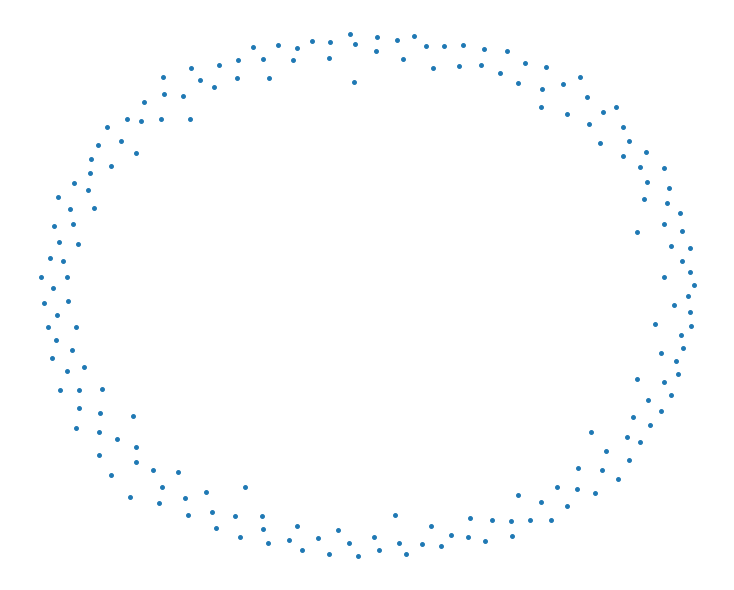

In [66]:
figure(figsize=(10, 8))
nx.draw(G, node_size=15)

In [67]:
for entities in articles:
    if len(entities) > 1:
        for i in range(len(entities)-1):
           G.add_edges_from([(str(entities[i]),str(entities[i+1]))])
        
   

In [70]:
figure(figsize=(200, 160))
nx.draw(G, node_size=10, labels={node:node for node in G.nodes()} )

In [26]:
nx.write_gexf(G, "npr_coronavirus_GPE_50.gexf")

In [107]:
cnn_paper = newspaper.build('https://www.dnaindia.com/bollywood/')

In [108]:
cnn_paper.category_urls()

['https://www.dnaindia.com/topic/sushant-singh-rajput/',
 'https://www.dnaindia.com/photo-gallery',
 'https://www.dnaindia.com/analysis',
 'https://www.dnaindia.com/lifestyle',
 'https://www.dnaindia.com/world',
 'https://www.dnaindia.com/ahmedabad',
 'https://www.dnaindia.com/authors',
 'https://www.dnaindia.com/television',
 'https://www.dnaindia.com/topics',
 'https://www.dnaindia.com/cricket',
 'https://www.dnaindia.com/delhi',
 'https://www.dnaindia.com/sports',
 'https://www.dnaindia.com/ipl',
 'https://www.dnaindia.com/mumbai',
 'https://www.dnaindia.com/hollywood',
 'https://www.dnaindia.com/education',
 'https://www.dnaindia.com/india',
 'https://www.dnaindia.com/sexuality',
 'https://www.dnaindia.com/videos',
 'https://www.dnaindia.com/bollywood',
 'https://www.dnaindia.com/explore',
 'https://www.dnaindia.com/investors',
 'https://www.dnaindia.com/exclusives',
 'https://www.dnaindia.com/jaipur',
 'https://www.dnaindia.com/business',
 'https://www.dnaindia.com/elections',
 'h

In [28]:
df.Text

29      Hitting back at actor-presenter and Farhan Akh...
59      On Tuesday, when Bollywood actor Rhea Chakrabo...
64      Actor Tanuj Virwani, best remembered for his r...
65      Sushant Singh Rajput fans have been trending v...
66      Bollywood actress Rhea Chakraborty, who was ar...
                              ...                        
5554    Aksahy Kumar in Laxmmi Bomb. (Image courtesy: ...
5595    The Mumbai film industry, facing massive scrut...
5598    01\r\n\r\nSource: Photo: Santosh Nagwekar\r\n\...
5599    01\r\n\r\nActor Sushant Singh Rajput was found...
5601    Sidharth Malhotra shared this image. (courtesy...
Name: Text, Length: 98, dtype: object